In [48]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [49]:
df=pd.read_csv('Book1.csv')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [50]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [52]:
df.isnull().sum()/df.shape[0]*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [53]:
# dropping last 3 columns
df=df.iloc[:,0:2]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [54]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [55]:
5572-403

5169

In [56]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])

In [59]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [60]:
# check for duplicates
df.duplicated().sum()

403

In [61]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [62]:
df.duplicated().sum()

0

In [63]:
df.shape

(5169, 2)

# 2. EDA (Exploratory Data Analysis)

In [64]:
# How may Spam and not spam sms are their
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

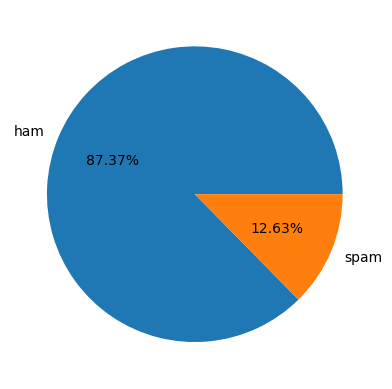

In [65]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%')
plt.show()

**data is imbalanced**

In [66]:
# ! pip install nltk

In [67]:
import nltk

In [68]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\verma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
# counting the number of characters in an email
df['num_characters']=df['text'].apply(len)

In [70]:
# num of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [71]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [72]:
# number of sentences
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [73]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [74]:
df.iloc[:,2:].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [75]:
# ham messages
df[df['target']==0].iloc[:,2:].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [76]:
# spam messages
df[df['target']==1].iloc[:,2:].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [77]:
import seaborn as sns

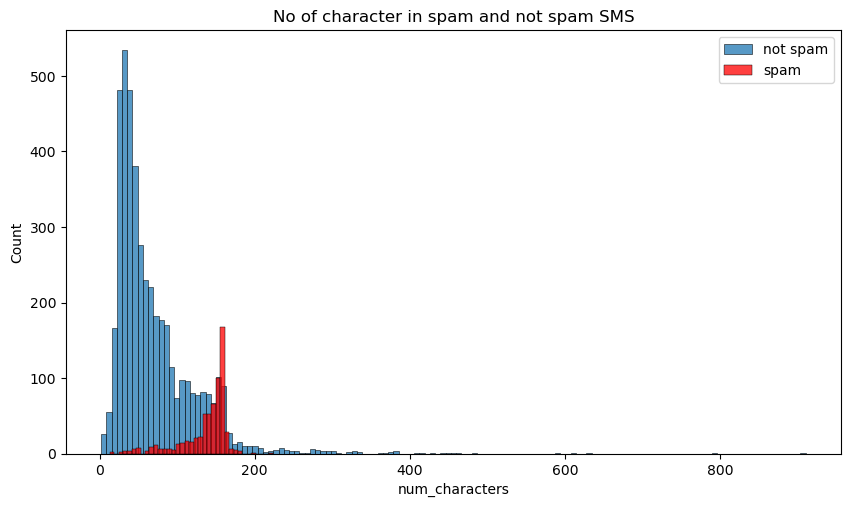

In [78]:
plt.figure(figsize=(10,5.5))
plt.title('No of character in spam and not spam SMS')
sns.histplot(df[df['target']==0].iloc[:,2],label='not spam')
sns.histplot(df[df['target']==1].iloc[:,2],color='red',label='spam')
plt.legend()
plt.show()


**aapke jo not spam messages hai usmein jo characters use ho rhe h woh zaadaa hai**


 **where as aapke jo spam messages has usmein characters thode kamm hai**

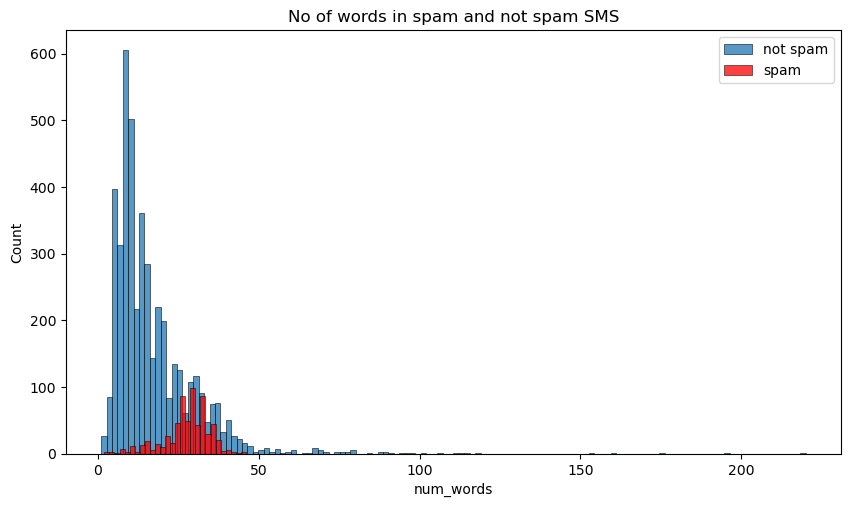

In [79]:
plt.figure(figsize=(10,5.5))
plt.title('No of words in spam and not spam SMS')
sns.histplot(df[df['target']==0].iloc[:,3],label='not spam')
sns.histplot(df[df['target']==1].iloc[:,3],color='red',label='spam')
plt.legend()
plt.show()



**mostly  spam messages kam word se millkar bnte hai**

**and not spam messages zaadaaa words se millkar bnte hai**

In [80]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


<Axes: >

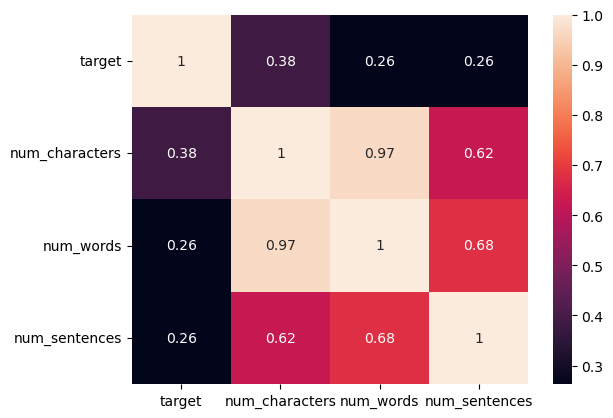

In [81]:
sns.heatmap(df.corr(),annot=True)

**Apna target jo hai num_character pr 0.38 ka correlation hai**


**mean jitne zaaadaa aapke character badhte hai toh 1 hone ka tendency bhi badhta hai mean spam**

**after looking this heatmap isee that here is a high multicollinearity so i will select only 1 column**

# Data Preprocessing
- Lower Case
- Tokenization
- Removing Special Characters
- Removing Stop words & punctuations
- Stemming

In [82]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [83]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [84]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('joinning')

'join'

In [85]:
def transform_text(text):
    text=text.lower()# converting in lower case
    text=nltk.word_tokenize(text)# splitting into words
    print(text)
    # removing special characters
    L=[]
    for i in text:
        if i.isalnum():
            L.append(i)
    print(L)
    
#     # removing stop words and punctuation marks
    text=L.copy()
    L.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            L.append(i)
    print(L)
# #     # applying stemming
    text=L.copy()
    L.clear()
    for i in text:
        L.append(ps.stem(i))
        
    return " ".join(L)

In [86]:
transform_text('hello i am walking ? Are you joinning me.')

['hello', 'i', 'am', 'walking', '?', 'are', 'you', 'joinning', 'me', '.']
['hello', 'i', 'am', 'walking', 'are', 'you', 'joinning', 'me']
['hello', 'walking', 'joinning']


'hello walk join'

In [87]:
transform_text('i am enjoying this FDP on Machine Learning ? How about you.')

['i', 'am', 'enjoying', 'this', 'fdp', 'on', 'machine', 'learning', '?', 'how', 'about', 'you', '.']
['i', 'am', 'enjoying', 'this', 'fdp', 'on', 'machine', 'learning', 'how', 'about', 'you']
['enjoying', 'fdp', 'machine', 'learning']


'enjoy fdp machin learn'

In [88]:
# testing the function
transform_text(df['text'][10])

['i', "'m", 'gon', 'na', 'be', 'home', 'soon', 'and', 'i', 'do', "n't", 'want', 'to', 'talk', 'about', 'this', 'stuff', 'anymore', 'tonight', ',', 'k', '?', 'i', "'ve", 'cried', 'enough', 'today', '.']
['i', 'gon', 'na', 'be', 'home', 'soon', 'and', 'i', 'do', 'want', 'to', 'talk', 'about', 'this', 'stuff', 'anymore', 'tonight', 'k', 'i', 'cried', 'enough', 'today']
['gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymore', 'tonight', 'k', 'cried', 'enough', 'today']


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [89]:
df['transformed_text']=df['text'].apply(transform_text)

['go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'there', 'got', 'amore', 'wat', '...']
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', '...', 'joking', 'wif', 'u', 'oni', '...']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005.', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', '(', 'std', 'txt', 'rate', ')', 't', '&', 'c', "'s", 'apply', '08452810075over18', "'s"]
['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st'

['pls', 'go', 'ahead', 'watts', 'wanted', 'sure', 'great', 'weekend', 'abiola']
['did', 'i', 'forget', 'to', 'tell', 'you', '?', 'i', 'want', 'you', ',', 'i', 'need', 'you', ',', 'i', 'crave', 'you', '...', 'but', 'most', 'of', 'all', '...', 'i', 'love', 'you', 'my', 'sweet', 'arabian', 'steed', '...', 'mmmmmm', '...', 'yummy']
['did', 'i', 'forget', 'to', 'tell', 'you', 'i', 'want', 'you', 'i', 'need', 'you', 'i', 'crave', 'you', 'but', 'most', 'of', 'all', 'i', 'love', 'you', 'my', 'sweet', 'arabian', 'steed', 'mmmmmm', 'yummy']
['forget', 'tell', 'want', 'need', 'crave', 'love', 'sweet', 'arabian', 'steed', 'mmmmmm', 'yummy']
['07732584351', '-', 'rodger', 'burns', '-', 'msg', '=', 'we', 'tried', 'to', 'call', 'you', 're', 'your', 'reply', 'to', 'our', 'sms', 'for', 'a', 'free', 'nokia', 'mobile', '+', 'free', 'camcorder', '.', 'please', 'call', 'now', '08000930705', 'for', 'delivery', 'tomorrow']
['07732584351', 'rodger', 'burns', 'msg', 'we', 'tried', 'to', 'call', 'you', 're', 'y

['okay', 'name', 'ur', 'price', 'long', 'legal', 'wen', 'pick', 'u', 'ave', 'x', 'ams', 'xx']
['i', "'m", 'still', 'looking', 'for', 'a', 'car', 'to', 'buy', '.', 'and', 'have', 'not', 'gone', '4the', 'driving', 'test', 'yet', '.']
['i', 'still', 'looking', 'for', 'a', 'car', 'to', 'buy', 'and', 'have', 'not', 'gone', '4the', 'driving', 'test', 'yet']
['still', 'looking', 'car', 'buy', 'gone', '4the', 'driving', 'test', 'yet']
['wow', '.', 'you', "'re", 'right', '!', 'i', 'did', "n't", 'mean', 'to', 'do', 'that', '.', 'i', 'guess', 'once', 'i', 'gave', 'up', 'on', 'boston', 'men', 'and', 'changed', 'my', 'search', 'location', 'to', 'nyc', ',', 'something', 'changed', '.', 'cuz', 'on', 'my', 'signin', 'page', 'it', 'still', 'says', 'boston', '.']
['wow', 'you', 'right', 'i', 'did', 'mean', 'to', 'do', 'that', 'i', 'guess', 'once', 'i', 'gave', 'up', 'on', 'boston', 'men', 'and', 'changed', 'my', 'search', 'location', 'to', 'nyc', 'something', 'changed', 'cuz', 'on', 'my', 'signin', 'pag

['winner', 'u', 'specially', 'selected', '2', 'receive', 'cash', '4', 'holiday', 'flights', 'inc', 'speak', 'live', 'operator', '2', 'claim', '0871277810810']
['keep', 'yourself', 'safe', 'for', 'me', 'because', 'i', 'need', 'you', 'and', 'i', 'miss', 'you', 'already', 'and', 'i', 'envy', 'everyone', 'that', 'see', "'s", 'you', 'in', 'real', 'life']
['keep', 'yourself', 'safe', 'for', 'me', 'because', 'i', 'need', 'you', 'and', 'i', 'miss', 'you', 'already', 'and', 'i', 'envy', 'everyone', 'that', 'see', 'you', 'in', 'real', 'life']
['keep', 'safe', 'need', 'miss', 'already', 'envy', 'everyone', 'see', 'real', 'life']
['new', 'car', 'and', 'house', 'for', 'my', 'parents', '.', ':', ')', 'i', 'have', 'only', 'new', 'job', 'in', 'hand', ':', ')']
['new', 'car', 'and', 'house', 'for', 'my', 'parents', 'i', 'have', 'only', 'new', 'job', 'in', 'hand']
['new', 'car', 'house', 'parents', 'new', 'job', 'hand']
['i', "'m", 'so', 'in', 'love', 'with', 'you', '.', 'i', "'m", 'excited', 'each', 'd

['500', 'new', 'mobiles', '2004', 'must', 'go', 'txt', 'nokia', '89545', 'collect', 'today', '2optout']
['would', 'really', 'appreciate', 'if', 'you', 'call', 'me', '.', 'just', 'need', 'someone', 'to', 'talk', 'to', '.']
['would', 'really', 'appreciate', 'if', 'you', 'call', 'me', 'just', 'need', 'someone', 'to', 'talk', 'to']
['would', 'really', 'appreciate', 'call', 'need', 'someone', 'talk']
['will', 'u', 'meet', 'ur', 'dream', 'partner', 'soon', '?', 'is', 'ur', 'career', 'off', '2', 'a', 'flyng', 'start', '?', '2', 'find', 'out', 'free', ',', 'txt', 'horo', 'followed', 'by', 'ur', 'star', 'sign', ',', 'e.', 'g.', 'horo', 'aries']
['will', 'u', 'meet', 'ur', 'dream', 'partner', 'soon', 'is', 'ur', 'career', 'off', '2', 'a', 'flyng', 'start', '2', 'find', 'out', 'free', 'txt', 'horo', 'followed', 'by', 'ur', 'star', 'sign', 'horo', 'aries']
['u', 'meet', 'ur', 'dream', 'partner', 'soon', 'ur', 'career', '2', 'flyng', 'start', '2', 'find', 'free', 'txt', 'horo', 'followed', 'ur', 's

['yeah', 'think', 'usual', 'guy', 'still', 'passed', 'last', 'night', 'get', 'ahold', 'anybody', 'let', 'know', 'throw']
['k', ',', 'i', 'might', 'come', 'by', 'tonight', 'then', 'if', 'my', 'class', 'lets', 'out', 'early']
['k', 'i', 'might', 'come', 'by', 'tonight', 'then', 'if', 'my', 'class', 'lets', 'out', 'early']
['k', 'might', 'come', 'tonight', 'class', 'lets', 'early']
['ok', '..']
['ok']
['ok']
['hi', 'baby', 'im', 'cruisin', 'with', 'my', 'girl', 'friend', 'what', 'r', 'u', 'up', '2', '?', 'give', 'me', 'a', 'call', 'in', 'and', 'hour', 'at', 'home', 'if', 'thats', 'alright', 'or', 'fone', 'me', 'on', 'this', 'fone', 'now', 'love', 'jenny', 'xxx']
['hi', 'baby', 'im', 'cruisin', 'with', 'my', 'girl', 'friend', 'what', 'r', 'u', 'up', '2', 'give', 'me', 'a', 'call', 'in', 'and', 'hour', 'at', 'home', 'if', 'thats', 'alright', 'or', 'fone', 'me', 'on', 'this', 'fone', 'now', 'love', 'jenny', 'xxx']
['hi', 'baby', 'im', 'cruisin', 'girl', 'friend', 'r', 'u', '2', 'give', 'call

['checking', 'really', 'miss', 'seeing', 'jeremiah', 'great', 'month']
['nah', 'ca', "n't", 'help', 'you', 'there', ',', 'i', "'ve", 'never', 'had', 'an', 'iphone']
['nah', 'ca', 'help', 'you', 'there', 'i', 'never', 'had', 'an', 'iphone']
['nah', 'ca', 'help', 'never', 'iphone']
['if', 'you', "'re", 'not', 'in', 'my', 'car', 'in', 'an', 'hour', 'and', 'a', 'half', 'i', "'m", 'going', 'apeshit']
['if', 'you', 'not', 'in', 'my', 'car', 'in', 'an', 'hour', 'and', 'a', 'half', 'i', 'going', 'apeshit']
['car', 'hour', 'half', 'going', 'apeshit']
['today', 'is', 'sorry', 'day.', '!', 'if', 'ever', 'i', 'was', 'angry', 'with', 'you', ',', 'if', 'ever', 'i', 'misbehaved', 'or', 'hurt', 'you', '?', 'plz', 'plz', 'just', 'slap', 'urself', 'bcoz', ',', 'its', 'ur', 'fault', ',', 'i', "'m", 'basically', 'good']
['today', 'is', 'sorry', 'if', 'ever', 'i', 'was', 'angry', 'with', 'you', 'if', 'ever', 'i', 'misbehaved', 'or', 'hurt', 'you', 'plz', 'plz', 'just', 'slap', 'urself', 'bcoz', 'its', 'ur'

['hair', 'cream', 'shipped']
['none', 'of', 'that', "'s", 'happening', 'til', 'you', 'get', 'here', 'though']
['none', 'of', 'that', 'happening', 'til', 'you', 'get', 'here', 'though']
['none', 'happening', 'til', 'get', 'though']
['yep', ',', 'the', 'great', 'loxahatchee', 'xmas', 'tree', 'burning', 'of', '&', 'lt', ';', '#', '&', 'gt', ';', 'starts', 'in', 'an', 'hour']
['yep', 'the', 'great', 'loxahatchee', 'xmas', 'tree', 'burning', 'of', 'lt', 'gt', 'starts', 'in', 'an', 'hour']
['yep', 'great', 'loxahatchee', 'xmas', 'tree', 'burning', 'lt', 'gt', 'starts', 'hour']
['haha', 'get', 'used', 'to', 'driving', 'to', 'usf', 'man', ',', 'i', 'know', 'a', 'lot', 'of', 'stoners']
['haha', 'get', 'used', 'to', 'driving', 'to', 'usf', 'man', 'i', 'know', 'a', 'lot', 'of', 'stoners']
['haha', 'get', 'used', 'driving', 'usf', 'man', 'know', 'lot', 'stoners']
['all', 'was', 'well', 'until', 'slightly', 'disastrous', 'class', 'this', 'pm', 'with', 'my', 'fav', 'darlings', '!', 'hope', 'day', 'o

['yup', 'need', 'jus', 'wait', '4', 'e', 'rain', '2', 'stop']
['there', 'are', 'many', 'company', '.', 'tell', 'me', 'the', 'language', '.']
['there', 'are', 'many', 'company', 'tell', 'me', 'the', 'language']
['many', 'company', 'tell', 'language']
['okmail', ':', 'dear', 'dave', 'this', 'is', 'your', 'final', 'notice', 'to', 'collect', 'your', '4', '*', 'tenerife', 'holiday', 'or', '#', '5000', 'cash', 'award', '!', 'call', '09061743806', 'from', 'landline', '.', 'tcs', 'sae', 'box326', 'cw25wx', '150ppm']
['okmail', 'dear', 'dave', 'this', 'is', 'your', 'final', 'notice', 'to', 'collect', 'your', '4', 'tenerife', 'holiday', 'or', '5000', 'cash', 'award', 'call', '09061743806', 'from', 'landline', 'tcs', 'sae', 'box326', 'cw25wx', '150ppm']
['okmail', 'dear', 'dave', 'final', 'notice', 'collect', '4', 'tenerife', 'holiday', '5000', 'cash', 'award', 'call', '09061743806', 'landline', 'tcs', 'sae', 'box326', 'cw25wx', '150ppm']
['how', 'long', 'has', 'it', 'been', 'since', 'you', 'scre

['good', 'afternoon', 'love', 'goes', 'day', 'hope', 'maybe', 'got', 'leads', 'job', 'think', 'boytoy', 'send', 'passionate', 'kiss', 'across', 'sea']
['probably', 'gon', 'na', 'be', 'here', 'for', 'a', 'while', ',', 'see', 'you', 'later', 'tonight', '&', 'lt', ';', ')']
['probably', 'gon', 'na', 'be', 'here', 'for', 'a', 'while', 'see', 'you', 'later', 'tonight', 'lt']
['probably', 'gon', 'na', 'see', 'later', 'tonight', 'lt']
['or', 'maybe', 'my', 'fat', 'fingers', 'just', 'press', 'all', 'these', 'buttons', 'and', 'it', 'does', "n't", 'know', 'what', 'to', 'do', '.']
['or', 'maybe', 'my', 'fat', 'fingers', 'just', 'press', 'all', 'these', 'buttons', 'and', 'it', 'does', 'know', 'what', 'to', 'do']
['maybe', 'fat', 'fingers', 'press', 'buttons', 'know']
['ummmmmaah', 'many', 'many', 'happy', 'returns', 'of', 'd', 'day', 'my', 'dear', 'sweet', 'heart', '..', 'happy', 'birthday', 'dear']
['ummmmmaah', 'many', 'many', 'happy', 'returns', 'of', 'd', 'day', 'my', 'dear', 'sweet', 'heart',

['ur', 'chance', 'win', 'wkly', 'shopping', 'spree', 'txt', 'shop', 'c', 'custcare', '08715705022']
['you', 'have', 'been', 'specially', 'selected', 'to', 'receive', 'a', '2000', 'pound', 'award', '!', 'call', '08712402050', 'before', 'the', 'lines', 'close', '.', 'cost', '10ppm', '.', '16+', '.', 't', '&', 'cs', 'apply', '.', 'ag', 'promo']
['you', 'have', 'been', 'specially', 'selected', 'to', 'receive', 'a', '2000', 'pound', 'award', 'call', '08712402050', 'before', 'the', 'lines', 'close', 'cost', '10ppm', 't', 'cs', 'apply', 'ag', 'promo']
['specially', 'selected', 'receive', '2000', 'pound', 'award', 'call', '08712402050', 'lines', 'close', 'cost', '10ppm', 'cs', 'apply', 'ag', 'promo']
['private', '!', 'your', '2003', 'account', 'statement', 'for', '07753741225', 'shows', '800', 'un-redeemed', 's.', 'i.', 'm.', 'points', '.', 'call', '08715203677', 'identifier', 'code', ':', '42478', 'expires', '24/10/04']
['private', 'your', '2003', 'account', 'statement', 'for', '07753741225',

['doesnt', 'make', 'sense', 'take', 'unless', 'free', 'need', 'know']
['88800', 'and', '89034', 'are', 'premium', 'phone', 'services', 'call', '08718711108']
['88800', 'and', '89034', 'are', 'premium', 'phone', 'services', 'call', '08718711108']
['88800', '89034', 'premium', 'phone', 'services', 'call', '08718711108']
['under', 'the', 'sea', ',', 'there', 'lays', 'a', 'rock', '.', 'in', 'the', 'rock', ',', 'there', 'is', 'an', 'envelope', '.', 'in', 'the', 'envelope', ',', 'there', 'is', 'a', 'paper', '.', 'on', 'the', 'paper', ',', 'there', 'are', '3', 'words', '...', "'"]
['under', 'the', 'sea', 'there', 'lays', 'a', 'rock', 'in', 'the', 'rock', 'there', 'is', 'an', 'envelope', 'in', 'the', 'envelope', 'there', 'is', 'a', 'paper', 'on', 'the', 'paper', 'there', 'are', '3', 'words']
['sea', 'lays', 'rock', 'rock', 'envelope', 'envelope', 'paper', 'paper', '3', 'words']
['then', 'mum', "'s", 'repent', 'how', '?']
['then', 'mum', 'repent', 'how']
['mum', 'repent']
['sorry', 'me', 'going

['macha', 'dont', 'feel', 'assume', 'one', 'evening', 'wonderful', 'plans', 'life', 'begin', 'anytime']
['oh', 'is', 'it', '?', 'send', 'me', 'the', 'address']
['oh', 'is', 'it', 'send', 'me', 'the', 'address']
['oh', 'send', 'address']
["s'fine", '.', 'anytime', '.', 'all', 'the', 'best', 'with', 'it', '.']
['anytime', 'all', 'the', 'best', 'with', 'it']
['anytime', 'best']
['that', 'is', 'wondar', 'full', 'flim', '.']
['that', 'is', 'wondar', 'full', 'flim']
['wondar', 'full', 'flim']
['ya', 'even', 'those', 'cookies', 'have', 'jelly', 'on', 'them']
['ya', 'even', 'those', 'cookies', 'have', 'jelly', 'on', 'them']
['ya', 'even', 'cookies', 'jelly']
['the', 'world', 'is', 'running', 'and', 'i', 'am', 'still.maybe', 'all', 'are', 'feeling', 'the', 'same', ',', 'so', 'be', 'it.or', 'i', 'have', 'to', 'admit', ',', 'i', 'am', 'mad.then', 'where', 'is', 'the', 'correction', '?', 'or', 'let', 'me', 'call', 'this', 'is', 'life.and', 'keep', 'running', 'with', 'the', 'world', ',', 'may', 'be

['happy', 'new', 'year', 'dear', 'brother', 'really', 'miss', 'got', 'number', 'decided', 'send', 'text', 'wishing', 'happiness', 'abiola']
['that', 'means', 'get', 'the', 'door']
['that', 'means', 'get', 'the', 'door']
['means', 'get', 'door']
['hmmm', '...', 'i', 'thought', 'we', 'said', '2', 'hours', 'slave', ',', 'not', '3', '...', 'you', 'are', 'late', '...', 'how', 'should', 'i', 'punish', 'you', '?']
['hmmm', 'i', 'thought', 'we', 'said', '2', 'hours', 'slave', 'not', '3', 'you', 'are', 'late', 'how', 'should', 'i', 'punish', 'you']
['hmmm', 'thought', 'said', '2', 'hours', 'slave', '3', 'late', 'punish']
['beerage', '?']
['beerage']
['beerage']
['you', 'have', 'an', 'important', 'customer', 'service', 'announcement', 'from', 'premier', '.', 'call', 'freephone', '0800', '542', '0578', 'now', '!']
['you', 'have', 'an', 'important', 'customer', 'service', 'announcement', 'from', 'premier', 'call', 'freephone', '0800', '542', '0578', 'now']
['important', 'customer', 'service', 'ann

['sir', 'late', 'paying', 'rent', 'past', 'months', 'pay', 'lt', 'gt', 'charge', 'felt', 'would', 'inconsiderate', 'nag', 'something', 'give', 'great', 'cost', 'didnt', 'speak', 'however', 'recession', 'wont', 'able', 'pay', 'charge', 'month', 'hence', 'askin', 'well', 'ahead', 'month', 'end', 'please', 'help', 'thanks']
['we', 'tried', 'to', 'contact', 'you', 're', 'our', 'offer', 'of', 'new', 'video', 'phone', '750', 'anytime', 'any', 'network', 'mins', 'half', 'price', 'rental', 'camcorder', 'call', '08000930705', 'or', 'reply', 'for', 'delivery', 'wed']
['we', 'tried', 'to', 'contact', 'you', 're', 'our', 'offer', 'of', 'new', 'video', 'phone', '750', 'anytime', 'any', 'network', 'mins', 'half', 'price', 'rental', 'camcorder', 'call', '08000930705', 'or', 'reply', 'for', 'delivery', 'wed']
['tried', 'contact', 'offer', 'new', 'video', 'phone', '750', 'anytime', 'network', 'mins', 'half', 'price', 'rental', 'camcorder', 'call', '08000930705', 'reply', 'delivery', 'wed']
['last', 'ch

['nutter', 'cutter', 'ctter', 'cttergg', 'cttargg', 'ctargg', 'ctagg', 'ie']
['it', "'s", 'ok', 'i', 'noe', 'u', "'re", 'busy', 'but', 'i', "'m", 'really', 'too', 'bored', 'so', 'i', 'msg', 'u.', 'i', 'oso', 'dunno', 'wat', 'colour', 'she', 'choose', '4', 'me', 'one', '.']
['it', 'ok', 'i', 'noe', 'u', 'busy', 'but', 'i', 'really', 'too', 'bored', 'so', 'i', 'msg', 'i', 'oso', 'dunno', 'wat', 'colour', 'she', 'choose', '4', 'me', 'one']
['ok', 'noe', 'u', 'busy', 'really', 'bored', 'msg', 'oso', 'dunno', 'wat', 'colour', 'choose', '4', 'one']
['does', "n't", 'g', 'have', 'class', 'early', 'tomorrow', 'and', 'thus', 'should', "n't", 'be', 'trying', 'to', 'smoke', 'at', '&', 'lt', ';', '#', '&', 'gt', ';']
['does', 'g', 'have', 'class', 'early', 'tomorrow', 'and', 'thus', 'should', 'be', 'trying', 'to', 'smoke', 'at', 'lt', 'gt']
['g', 'class', 'early', 'tomorrow', 'thus', 'trying', 'smoke', 'lt', 'gt']
['superb', 'thought-', '\\be', 'grateful', 'that', 'u', 'dont', 'have', 'everything',

['sorry', 'c', 'ur', 'msg', 'yar', 'lor', 'poor', 'thing', '4', 'one', 'night', 'tmr', 'u', 'brand', 'new', 'room', '2', 'sleep']
['love', 'is', "n't", 'a', 'decision', ',', 'it', "'s", 'a', 'feeling', '.', 'if', 'we', 'could', 'decide', 'who', 'to', 'love', ',', 'then', ',', 'life', 'would', 'be', 'much', 'simpler', ',', 'but', 'then', 'less', 'magical']
['love', 'is', 'a', 'decision', 'it', 'a', 'feeling', 'if', 'we', 'could', 'decide', 'who', 'to', 'love', 'then', 'life', 'would', 'be', 'much', 'simpler', 'but', 'then', 'less', 'magical']
['love', 'decision', 'feeling', 'could', 'decide', 'love', 'life', 'would', 'much', 'simpler', 'less', 'magical']
['welp', 'apparently', 'he', 'retired']
['welp', 'apparently', 'he', 'retired']
['welp', 'apparently', 'retired']
['my', 'sort', 'code', 'is', 'and', 'acc', 'no', 'is', '.', 'the', 'bank', 'is', 'natwest', '.', 'can', 'you', 'reply', 'to', 'confirm', 'i', "'ve", 'sent', 'this', 'to', 'the', 'right', 'person', '!']
['my', 'sort', 'code',

['still', 'tonight']
['may', 'i', 'call', 'you', 'later', 'pls']
['may', 'i', 'call', 'you', 'later', 'pls']
['may', 'call', 'later', 'pls']
['has', "n't", 'that', 'been', 'the', 'pattern', 'recently', 'crap', 'weekends', '?']
['has', 'that', 'been', 'the', 'pattern', 'recently', 'crap', 'weekends']
['pattern', 'recently', 'crap', 'weekends']
['i', 'have', 'a', 'sore', 'throat', '.', 'it', "'s", 'scratches', 'when', 'i', 'talk']
['i', 'have', 'a', 'sore', 'throat', 'it', 'scratches', 'when', 'i', 'talk']
['sore', 'throat', 'scratches', 'talk']
['yes', 'da', '.', 'any', 'plm', 'at', 'ur', 'office']
['yes', 'da', 'any', 'plm', 'at', 'ur', 'office']
['yes', 'da', 'plm', 'ur', 'office']
['are', 'you', 'not', 'around', 'or', 'just', 'still', 'asleep', '?', ':', 'v']
['are', 'you', 'not', 'around', 'or', 'just', 'still', 'asleep', 'v']
['around', 'still', 'asleep', 'v']
['lol', 'you', 'forgot', 'it', 'eh', '?', 'yes', ',', 'i', "'ll", 'bring', 'it', 'in', 'babe']
['lol', 'you', 'forgot', 'it

['love', 'start', 'feel', 'need', 'every', 'time', 'around', 'first', 'thing', 'comes', 'would', 'start', 'day', 'end', 'every', 'time', 'every', 'breath', 'life', 'happen', 'around', 'life', 'named', 'would', 'cry', 'give', 'happiness', 'take', 'ready', 'fight', 'anyone', 'love', 'craziest', 'things', 'proove', 'anyone', 'girl', 'beautiful', 'lady', 'whole', 'always', 'singing', 'praises', 'start', 'making', 'chicken', 'curry', 'end', 'makiing', 'beautiful', 'get', 'every', 'morning', 'thank', 'god', 'day', 'would', 'like', 'say', 'lot', 'tell', 'later']
["fr'ndship", 'is', 'like', 'a', 'needle', 'of', 'a', 'clock', '.', 'though', 'v', 'r', 'in', 'd', 'same', 'clock', ',', 'v', 'r', 'nt', 'able', '2', 'met', '.', 'evn', 'if', 'v', 'meet', ',', 'itz', 'only', '4few', 'seconds', '.', 'bt', 'v', 'alwys', 'stay', 'conected', '.', 'gud', '9t', ';', '-', ')']
['is', 'like', 'a', 'needle', 'of', 'a', 'clock', 'though', 'v', 'r', 'in', 'd', 'same', 'clock', 'v', 'r', 'nt', 'able', '2', 'met',

['u', 'find', 'sitter', 'kaitlyn', 'sick', 'slept', 'day', 'yesterday']
['sorry', 'man', ',', 'accidentally', 'left', 'my', 'phone', 'on', 'silent', 'last', 'night', 'and', 'did', "n't", 'check', 'it', 'til', 'i', 'got', 'up']
['sorry', 'man', 'accidentally', 'left', 'my', 'phone', 'on', 'silent', 'last', 'night', 'and', 'did', 'check', 'it', 'til', 'i', 'got', 'up']
['sorry', 'man', 'accidentally', 'left', 'phone', 'silent', 'last', 'night', 'check', 'til', 'got']
['hey', '..', 'something', 'came', 'up', 'last', 'min', '..', 'think', 'i', 'wun', 'be', 'signing', 'up', 'tmr', '..', 'hee']
['hey', 'something', 'came', 'up', 'last', 'min', 'think', 'i', 'wun', 'be', 'signing', 'up', 'tmr', 'hee']
['hey', 'something', 'came', 'last', 'min', 'think', 'wun', 'signing', 'tmr', 'hee']
['he', "'s", 'an', 'adult', 'and', 'would', 'learn', 'from', 'the', 'experience', '.', 'there', "'s", 'no', 'real', 'danger', '.', 'i', 'just', 'dont', 'like', 'peeps', 'using', 'drugs', 'they', 'dont', 'need', 

['free', 'entry', 'weekly', 'comp', 'send', 'word', 'enter', '84128', '18', 'c', 'cust', 'care', '08712405020']
['jus', 'ans', 'me', 'lar', '.', 'u', "'ll", 'noe', 'later', '.']
['jus', 'ans', 'me', 'lar', 'u', 'noe', 'later']
['jus', 'ans', 'lar', 'u', 'noe', 'later']
['i', 'want', 'to', 'send', 'something', 'that', 'can', 'sell', 'fast', '.', '&', 'lt', ';', '#', '&', 'gt', ';', 'k', 'is', 'not', 'easy', 'money', '.']
['i', 'want', 'to', 'send', 'something', 'that', 'can', 'sell', 'fast', 'lt', 'gt', 'k', 'is', 'not', 'easy', 'money']
['want', 'send', 'something', 'sell', 'fast', 'lt', 'gt', 'k', 'easy', 'money']
['have', 'got', '*', 'few', 'things', 'to', 'do', '.', 'may', 'be', 'in', '*', 'pub', 'later', '.']
['have', 'got', 'few', 'things', 'to', 'do', 'may', 'be', 'in', 'pub', 'later']
['got', 'things', 'may', 'pub', 'later']
['1', "'s", 'finish', 'meeting', 'call', 'me', '.']
['1', 'finish', 'meeting', 'call', 'me']
['1', 'finish', 'meeting', 'call']
['lol', 'ok.', 'i', "'ll", '

['designation', 'software', 'developer', 'may', 'get', 'chennai']
['enjoy', 'the', 'jamster', 'videosound', 'gold', 'club', 'with', 'your', 'credits', 'for', '2', 'new', 'videosounds+2', 'logos+musicnews', '!', 'get', 'more', 'fun', 'from', 'jamster.co.uk', '!', '16+only', 'help', '?', 'call', ':', '09701213186']
['enjoy', 'the', 'jamster', 'videosound', 'gold', 'club', 'with', 'your', 'credits', 'for', '2', 'new', 'get', 'more', 'fun', 'from', 'help', 'call', '09701213186']
['enjoy', 'jamster', 'videosound', 'gold', 'club', 'credits', '2', 'new', 'get', 'fun', 'help', 'call', '09701213186']
['get', '3', 'lions', 'england', 'tone', ',', 'reply', 'lionm', '4', 'mono', 'or', 'lionp', '4', 'poly', '.', '4', 'more', 'go', '2', 'www.ringtones.co.uk', ',', 'the', 'original', 'n', 'best', '.', 'tones', '3gbp', 'network', 'operator', 'rates', 'apply']
['get', '3', 'lions', 'england', 'tone', 'reply', 'lionm', '4', 'mono', 'or', 'lionp', '4', 'poly', '4', 'more', 'go', '2', 'the', 'original', '

['know', 'thing', 'wrong', 'everyso', 'often', 'panicks', 'starts', 'goin', 'bout', 'bein', 'good', 'enough']
['alright', '.', 'i', "'m", 'out', '--', 'have', 'a', 'good', 'night', '!']
['alright', 'i', 'out', 'have', 'a', 'good', 'night']
['alright', 'good', 'night']
['did', 'you', 'try', 'making', 'another', 'butt', '.']
['did', 'you', 'try', 'making', 'another', 'butt']
['try', 'making', 'another', 'butt']
['hope', 'you', 'are', 'feeling', 'great', '.', 'pls', 'fill', 'me', 'in', '.', 'abiola']
['hope', 'you', 'are', 'feeling', 'great', 'pls', 'fill', 'me', 'in', 'abiola']
['hope', 'feeling', 'great', 'pls', 'fill', 'abiola']
['i', 'though', 'we', 'shd', 'go', 'out', 'n', 'have', 'some', 'fun', 'so', 'bar', 'in', 'town', 'or', 'something', '‰ûò', 'sound', 'ok', '?']
['i', 'though', 'we', 'shd', 'go', 'out', 'n', 'have', 'some', 'fun', 'so', 'bar', 'in', 'town', 'or', 'something', 'sound', 'ok']
['though', 'shd', 'go', 'n', 'fun', 'bar', 'town', 'something', 'sound', 'ok']
['1', ')',

['wat', 'late', 'still', 'early', 'mah', 'juz', 'go', '4', 'dinner', 'lor', 'aiya', 'dunno']
['arms', 'fine', ',', 'how', "'s", 'cardiff', 'and', 'uni', '?']
['arms', 'fine', 'how', 'cardiff', 'and', 'uni']
['arms', 'fine', 'cardiff', 'uni']
['in', 'fact', 'when', 'do', 'you', 'leave', '?', 'i', 'think', 'addie', 'goes', 'back', 'to', 'school', 'tues', 'or', 'wed']
['in', 'fact', 'when', 'do', 'you', 'leave', 'i', 'think', 'addie', 'goes', 'back', 'to', 'school', 'tues', 'or', 'wed']
['fact', 'leave', 'think', 'addie', 'goes', 'back', 'school', 'tues', 'wed']
['cool', 'breeze', '...', 'bright', 'sun', '...', 'fresh', 'flower', '...', 'twittering', 'birds', '...', 'all', 'these', 'waiting', 'to', 'wish', 'u', ':', '\\goodmorning', '&', 'amp', ';', 'have', 'a', 'nice', 'day\\', "''", ':', ')', "''"]
['cool', 'breeze', 'bright', 'sun', 'fresh', 'flower', 'twittering', 'birds', 'all', 'these', 'waiting', 'to', 'wish', 'u', 'amp', 'have', 'a', 'nice']
['cool', 'breeze', 'bright', 'sun', 'fr

['time', 'n', 'smile', 'r', 'two', 'crucial', 'things', 'life', 'sometimes', 'time', 'makes', 'us', 'forget', 'smile', 'sometimes', 'someone', 'smile', 'makes', 'us', 'forget', 'time', 'gud', 'noon']
['sms', '.', 'ac', 'jsco', ':', 'energy', 'is', 'high', ',', 'but', 'u', 'may', 'not', 'know', 'where', '2channel', 'it', '.', '2day', 'ur', 'leadership', 'skills', 'r', 'strong', '.', 'psychic', '?', 'reply', 'ans', 'w/question', '.', 'end', '?', 'reply', 'end', 'jsco']
['sms', 'ac', 'jsco', 'energy', 'is', 'high', 'but', 'u', 'may', 'not', 'know', 'where', '2channel', 'it', '2day', 'ur', 'leadership', 'skills', 'r', 'strong', 'psychic', 'reply', 'ans', 'end', 'reply', 'end', 'jsco']
['sms', 'ac', 'jsco', 'energy', 'high', 'u', 'may', 'know', '2channel', '2day', 'ur', 'leadership', 'skills', 'r', 'strong', 'psychic', 'reply', 'ans', 'end', 'reply', 'end', 'jsco']
['host-based', 'idps', 'for', 'linux', 'systems', '.']
['idps', 'for', 'linux', 'systems']
['idps', 'linux', 'systems']
['hot',

['dnt', 'worry', 'use', 'ice', 'pieces', 'cloth', 'take', '2', 'tablets']
['dude', 'just', 'saw', 'a', 'parked', 'car', 'with', 'its', 'sunroof', 'popped', 'up', '.', 'sux']
['dude', 'just', 'saw', 'a', 'parked', 'car', 'with', 'its', 'sunroof', 'popped', 'up', 'sux']
['dude', 'saw', 'parked', 'car', 'sunroof', 'popped', 'sux']
['get', 'ready', 'to', 'put', 'on', 'your', 'excellent', 'sub', 'face', ':', ')']
['get', 'ready', 'to', 'put', 'on', 'your', 'excellent', 'sub', 'face']
['get', 'ready', 'put', 'excellent', 'sub', 'face']
['tmrw', '.', 'im', 'finishing', '9', 'doors']
['tmrw', 'im', 'finishing', '9', 'doors']
['tmrw', 'im', 'finishing', '9', 'doors']
['the', '&', 'lt', ';', '#', '&', 'gt', ';', 'g', 'that', 'i', 'saw', 'a', 'few', 'days', 'ago', ',', 'the', 'guy', 'wants', 'sell', 'wifi', 'only', 'for', '&', 'lt', ';', '#', '&', 'gt', ';', 'and', 'with', '3g', 'for', '&', 'lt', ';', '#', '&', 'gt', ';', '.', 'that', "'s", 'why', 'i', 'blanked', 'him', '.']
['the', 'lt', 'gt', '

['fuck', 'babe', 'miss', 'sooooo', 'much', 'wish', 'sleep', 'bed', 'lonely', 'go', 'sleep', 'dream', 'love']
['living', 'is', 'very', 'simple', '..', 'loving', 'is', 'also', 'simple', '..', 'laughing', 'is', 'too', 'simple', '..', 'winning', 'is', 'tooo', 'simple', '..', 'but', ',', 'being', "'simple", "'", 'is', 'very', 'difficult', '..', 'gud', 'nte', '.', ':', '-']
['living', 'is', 'very', 'simple', 'loving', 'is', 'also', 'simple', 'laughing', 'is', 'too', 'simple', 'winning', 'is', 'tooo', 'simple', 'but', 'being', 'is', 'very', 'difficult', 'gud', 'nte']
['living', 'simple', 'loving', 'also', 'simple', 'laughing', 'simple', 'winning', 'tooo', 'simple', 'difficult', 'gud', 'nte']
['u', 'have', 'a', 'secret', 'admirer', 'who', 'is', 'looking', '2', 'make', 'contact', 'with', 'u-find', 'out', 'who', 'they', 'r', '*', 'reveal', 'who', 'thinks', 'ur', 'so', 'special-call', 'on', '09058094599']
['u', 'have', 'a', 'secret', 'admirer', 'who', 'is', 'looking', '2', 'make', 'contact', 'wit

['free', 'top', 'ringtone', 'weekly', '1st', 'week', 'subpoly', '3', 'per']
['nan', 'sonathaya', 'soladha', '.', 'why', 'boss', '?']
['nan', 'sonathaya', 'soladha', 'why', 'boss']
['nan', 'sonathaya', 'soladha', 'boss']
['bring', 'tat', 'cd', 'don', 'forget']
['bring', 'tat', 'cd', 'don', 'forget']
['bring', 'tat', 'cd', 'forget']
['i', 'do', "n't", 'know', 'but', 'i', "'m", 'raping', 'dudes', 'at', 'poker']
['i', 'do', 'know', 'but', 'i', 'raping', 'dudes', 'at', 'poker']
['know', 'raping', 'dudes', 'poker']
['weightloss', '!', 'no', 'more', 'girl', 'friends', '.', 'make', 'loads', 'of', 'money', 'on', 'ebay', 'or', 'something', '.', 'and', 'give', 'thanks', 'to', 'god', '.']
['weightloss', 'no', 'more', 'girl', 'friends', 'make', 'loads', 'of', 'money', 'on', 'ebay', 'or', 'something', 'and', 'give', 'thanks', 'to', 'god']
['weightloss', 'girl', 'friends', 'make', 'loads', 'money', 'ebay', 'something', 'give', 'thanks', 'god']
['was', 'gr8', 'to', 'see', 'that', 'message', '.', 'so',

['lmao', 'ok', 'wont', 'needing', 'u', 'hair', 'anymore']
['miss', 'ya', ',', 'need', 'ya', ',', 'want', 'ya', ',', 'love', 'ya', '.']
['miss', 'ya', 'need', 'ya', 'want', 'ya', 'love', 'ya']
['miss', 'ya', 'need', 'ya', 'want', 'ya', 'love', 'ya']
['sorry', 'i', "'m", 'not', 'free', '...']
['sorry', 'i', 'not', 'free']
['sorry', 'free']
['do', 'u', 'ever', 'get', 'a', 'song', 'stuck', 'in', 'your', 'head', 'for', 'no', 'reason', 'and', 'it', 'wo', "n't", 'go', 'away', 'til', 'u', 'listen', 'to', 'it', 'like', '5', 'times', '?']
['do', 'u', 'ever', 'get', 'a', 'song', 'stuck', 'in', 'your', 'head', 'for', 'no', 'reason', 'and', 'it', 'wo', 'go', 'away', 'til', 'u', 'listen', 'to', 'it', 'like', '5', 'times']
['u', 'ever', 'get', 'song', 'stuck', 'head', 'reason', 'wo', 'go', 'away', 'til', 'u', 'listen', 'like', '5', 'times']
['nt', 'yet', 'chikku', '..', 'simple', 'habba', '..', 'hw', 'abt', 'u', '?']
['nt', 'yet', 'chikku', 'simple', 'habba', 'hw', 'abt', 'u']
['nt', 'yet', 'chikku',

['could', 'say', 'dying', 'man', 'feel', 'sad', 'go', 'wanted', 'know', 'would', 'probably', 'gone', 'late', 'night']
['if', 'you', "'re", 'thinking', 'of', 'lifting', 'me', 'one', 'then', 'no', '.']
['if', 'you', 'thinking', 'of', 'lifting', 'me', 'one', 'then', 'no']
['thinking', 'lifting', 'one']
['same', 'as', 'u', '...', 'dun', 'wan', '...', 'y', 'u', 'dun', 'like', 'me', 'already', 'ah', '...', 'wat', 'u', 'doing', 'now', '?', 'still', 'eating', '?']
['same', 'as', 'u', 'dun', 'wan', 'y', 'u', 'dun', 'like', 'me', 'already', 'ah', 'wat', 'u', 'doing', 'now', 'still', 'eating']
['u', 'dun', 'wan', 'u', 'dun', 'like', 'already', 'ah', 'wat', 'u', 'still', 'eating']
['sent', 'me', 'ur', 'email', 'id', 'soon']
['sent', 'me', 'ur', 'email', 'id', 'soon']
['sent', 'ur', 'email', 'id', 'soon']
['dude', '.', 'what', "'s", 'up', '.', 'how', 'teresa', '.', 'hope', 'you', 'have', 'been', 'okay', '.', 'when', 'i', 'didnt', 'hear', 'from', 'these', 'people', ',', 'i', 'called', 'them', 'and',

['pen', 'thing', 'beyond', 'joke', 'wont', 'biro', 'masters', 'ca', 'ever']
['i', 'am', 'at', 'a', 'party', 'with', 'alex', 'nichols']
['i', 'am', 'at', 'a', 'party', 'with', 'alex', 'nichols']
['party', 'alex', 'nichols']
['u', 'have', 'a', 'secret', 'admirer', 'who', 'is', 'looking', '2', 'make', 'contact', 'with', 'u-find', 'out', 'who', 'they', 'r', '*', 'reveal', 'who', 'thinks', 'ur', 'so', 'special-call', 'on', '09058094594']
['u', 'have', 'a', 'secret', 'admirer', 'who', 'is', 'looking', '2', 'make', 'contact', 'with', 'out', 'who', 'they', 'r', 'reveal', 'who', 'thinks', 'ur', 'so', 'on', '09058094594']
['u', 'secret', 'admirer', 'looking', '2', 'make', 'contact', 'r', 'reveal', 'thinks', 'ur', '09058094594']
['just', 'seeing', 'your', 'missed', 'call', 'my', 'dear', 'brother', '.', 'do', 'have', 'a', 'gr8', 'day', '.']
['just', 'seeing', 'your', 'missed', 'call', 'my', 'dear', 'brother', 'do', 'have', 'a', 'gr8', 'day']
['seeing', 'missed', 'call', 'dear', 'brother', 'gr8', '

['well', 'done', '4', 'costa', 'del', 'sol', 'holiday', 'await', 'collection', 'call', '09050090044', 'toclaim', 'sae', 'tcs', 'pobox334', 'stockport', 'sk38xh', 'max10mins']
['k', '...', 'k', ':', ')', 'why', 'cant', 'you', 'come', 'here', 'and', 'search', 'job', ':', ')']
['k', 'k', 'why', 'cant', 'you', 'come', 'here', 'and', 'search', 'job']
['k', 'k', 'cant', 'come', 'search', 'job']
['i', 'got', 'lousy', 'sleep', '.', 'i', 'kept', 'waking', 'up', 'every', '2', 'hours', 'to', 'see', 'if', 'my', 'cat', 'wanted', 'to', 'come', 'in', '.', 'i', 'worry', 'about', 'him', 'when', 'its', 'cold', ':', '(']
['i', 'got', 'lousy', 'sleep', 'i', 'kept', 'waking', 'up', 'every', '2', 'hours', 'to', 'see', 'if', 'my', 'cat', 'wanted', 'to', 'come', 'in', 'i', 'worry', 'about', 'him', 'when', 'its', 'cold']
['got', 'lousy', 'sleep', 'kept', 'waking', 'every', '2', 'hours', 'see', 'cat', 'wanted', 'come', 'worry', 'cold']
['yeah', ',', 'i', "'ll", 'leave', 'in', 'a', 'couple', 'minutes', '&', 'amp

['ca', 'keep', 'going', 'never', 'intention', 'run', 'choose', 'rather', 'keep', 'room', 'clean', 'say', 'visitors', 'maybe', 'best', 'choice', 'yes', 'wanted', 'embarassed', 'maybe', 'feel', 'feel', 'friend', 'wants', 'drop', 'buy', 'say', 'happened', 'morning', 'tried', 'everything', 'know', 'else']
['dunno', 'lei', '...', 'i', 'thk', 'mum', 'lazy', 'to', 'go', 'out', '...', 'i', 'neva', 'ask', 'her', 'yet', '...']
['dunno', 'lei', 'i', 'thk', 'mum', 'lazy', 'to', 'go', 'out', 'i', 'neva', 'ask', 'her', 'yet']
['dunno', 'lei', 'thk', 'mum', 'lazy', 'go', 'neva', 'ask', 'yet']
['do', 'whatever', 'you', 'want', '.', 'you', 'know', 'what', 'the', 'rules', 'are', '.', 'we', 'had', 'a', 'talk', 'earlier', 'this', 'week', 'about', 'what', 'had', 'to', 'start', 'happening', ',', 'you', 'showing', 'responsibility', '.', 'yet', ',', 'every', 'week', 'it', "'s", 'can', 'i', 'bend', 'the', 'rule', 'this', 'way', '?', 'what', 'about', 'that', 'way', '?', 'do', 'whatever', '.', 'i', "'m", 'tired'

['freemsg', 'claim', 'ur', '250', 'sms', 'ok', '84025', 'use', 'web2mobile', '2', 'ur', 'mates', 'etc', 'join', 'c', 'box139', 'la32wu', '16', 'remove', 'txtx', 'stop']
['yar', 'lor', 'actually', 'we', 'quite', 'fast', '...', 'cos', 'da', 'ge', 'slow', 'wat', '...', 'haha', '...']
['yar', 'lor', 'actually', 'we', 'quite', 'fast', 'cos', 'da', 'ge', 'slow', 'wat', 'haha']
['yar', 'lor', 'actually', 'quite', 'fast', 'cos', 'da', 'ge', 'slow', 'wat', 'haha']
['must', 'come', 'later', '..', 'i', 'normally', 'bathe', 'him', 'in', 'da', 'afternoon', 'mah', '..']
['must', 'come', 'later', 'i', 'normally', 'bathe', 'him', 'in', 'da', 'afternoon', 'mah']
['must', 'come', 'later', 'normally', 'bathe', 'da', 'afternoon', 'mah']
['trust', 'me', '.', 'even', 'if', 'is', "n't", 'there', ',', 'its', 'there', '.']
['trust', 'me', 'even', 'if', 'is', 'there', 'its', 'there']
['trust', 'even']
['hey', 'hun-onbus', 'goin', '2', 'meet', 'him', '.', 'he', 'wants', '2go', 'out', '4a', 'meal', 'but', 'i', 'd

['spoke', 'uncle', 'john', 'today', 'strongly', 'feels', 'need', 'sacrifice', 'keep', 'going', 'call', 'beg', 'listen', 'dont', 'make', 'promises', 'make', 'clear', 'things', 'easy', 'need', 'please', 'let', 'us', 'work', 'things', 'long', 'keep', 'expecting', 'help', 'creativity', 'stifled', 'pls', 'keep', 'happy', 'promises', 'part']
['carlos', 'took', 'a', 'while', '(', 'again', ')', ',', 'we', 'leave', 'in', 'a', 'minute']
['carlos', 'took', 'a', 'while', 'again', 'we', 'leave', 'in', 'a', 'minute']
['carlos', 'took', 'leave', 'minute']
['well', 'done', 'and', '!', 'luv', 'ya', 'all']
['well', 'done', 'and', 'luv', 'ya', 'all']
['well', 'done', 'luv', 'ya']
['then', 'why', 'you', 'came', 'to', 'hostel', '.']
['then', 'why', 'you', 'came', 'to', 'hostel']
['came', 'hostel']
['k', 'still', 'are', 'you', 'loving', 'me', '.']
['k', 'still', 'are', 'you', 'loving', 'me']
['k', 'still', 'loving']
['but', 'i', 'juz', 'remembered', 'i', 'got', 'ta', 'bathe', 'my', 'dog', 'today', '..']
['b

['haha', 'dinner', 'cousin']
['a', 'boy', 'was', 'late', '2', 'home', '.', 'his', 'father', ':', '\\power', 'of', 'frndship\\', "''", "''"]
['a', 'boy', 'was', 'late', '2', 'home', 'his', 'father', 'of']
['boy', 'late', '2', 'home', 'father']
['(', 'and', 'my', 'man', 'carlos', 'is', 'definitely', 'coming', 'by', 'mu', 'tonight', ',', 'no', 'excuses', ')']
['and', 'my', 'man', 'carlos', 'is', 'definitely', 'coming', 'by', 'mu', 'tonight', 'no', 'excuses']
['man', 'carlos', 'definitely', 'coming', 'mu', 'tonight', 'excuses']
['soon', 'you', 'will', 'have', 'the', 'real', 'thing', 'princess', '!', 'do', 'i', 'make', 'you', 'wet', '?', ':', ')']
['soon', 'you', 'will', 'have', 'the', 'real', 'thing', 'princess', 'do', 'i', 'make', 'you', 'wet']
['soon', 'real', 'thing', 'princess', 'make', 'wet']
['raji', '..', 'pls', 'do', 'me', 'a', 'favour', '.', 'pls', 'convey', 'my', 'birthday', 'wishes', 'to', 'nimya', '.', 'pls', '.', 'today', 'is', 'her', 'birthday', '.']
['raji', 'pls', 'do', 'me

['hi', 'ya', 'babe', 'x', 'u', '4goten', 'bout', 'scammers', 'getting', 'smart', 'though', 'regular', 'vodafone', 'respond', 'get', 'prem', 'rate', 'nos', 'used', 'also', 'beware']
['back', '2', 'work', '2morro', 'half', 'term', 'over', '!', 'can', 'u', 'c', 'me', '2nite', '4', 'some', 'sexy', 'passion', 'b4', 'i', 'have', '2', 'go', 'back', '?', 'chat', 'now', '09099726481', 'luv', 'dena', 'calls', 'å£1/minmobsmorelkpobox177hp51fl']
['back', '2', 'work', '2morro', 'half', 'term', 'over', 'can', 'u', 'c', 'me', '2nite', '4', 'some', 'sexy', 'passion', 'b4', 'i', 'have', '2', 'go', 'back', 'chat', 'now', '09099726481', 'luv', 'dena', 'calls']
['back', '2', 'work', '2morro', 'half', 'term', 'u', 'c', '2nite', '4', 'sexy', 'passion', 'b4', '2', 'go', 'back', 'chat', '09099726481', 'luv', 'dena', 'calls']
['will', 'you', 'like', 'to', 'be', 'spoiled', '?', ':', ')']
['will', 'you', 'like', 'to', 'be', 'spoiled']
['like', 'spoiled']
['thanks', 'for', 'your', 'ringtone', 'order', ',', 'ref',

['friendship', 'poem', 'dear', 'dear', 'u', 'r', 'near', 'hear', 'dont', 'get', 'fear', 'live', 'cheer', 'tear', 'u', 'r', 'always', 'dear', 'gud', 'ni8']
['still', 'in', 'the', 'area', 'of', 'the', 'restaurant', '.', 'ill', 'try', 'to', 'come', 'back', 'soon']
['still', 'in', 'the', 'area', 'of', 'the', 'restaurant', 'ill', 'try', 'to', 'come', 'back', 'soon']
['still', 'area', 'restaurant', 'ill', 'try', 'come', 'back', 'soon']
['aight', 'that', "'ll", 'work', ',', 'thanks']
['aight', 'that', 'work', 'thanks']
['aight', 'work', 'thanks']
['moby', 'pub', 'quiz.win', 'a', 'å£100', 'high', 'street', 'prize', 'if', 'u', 'know', 'who', 'the', 'new', 'duchess', 'of', 'cornwall', 'will', 'be', '?', 'txt', 'her', 'first', 'name', 'to', '82277.unsub', 'stop', 'å£1.50', '008704050406', 'sp', 'arrow']
['moby', 'pub', 'a', 'high', 'street', 'prize', 'if', 'u', 'know', 'who', 'the', 'new', 'duchess', 'of', 'cornwall', 'will', 'be', 'txt', 'her', 'first', 'name', 'to', 'stop', '008704050406', 'sp'

['boy', 'loved', 'gal', 'propsd', 'bt', 'didnt', 'mind', 'gv', 'lv', 'lttrs', 'bt', 'frnds', 'threw', 'thm', 'boy', 'decided', '2', 'aproach', 'gal', 'dt', 'time', 'truck', 'speeding', 'towards', 'gal', 'wn', '2', 'hit', 'girl', 'boy', 'ran', 'like', 'hell', 'n', 'saved', 'asked', 'cn', 'u', 'run', 'fast', 'boy', 'replied', 'secret', 'n', 'instantly', 'girl', 'shouted', 'n', 'thy', 'lived', 'happily', '2gthr', 'drinking', 'boost', 'evrydy', 'moral', 'story', 'hv', 'free', 'msgs', 'gud', 'ni8']
['that', 'day', 'ì_', 'say', 'ì_', 'cut', 'ur', 'hair', 'at', 'paragon', ',', 'is', 'it', 'called', 'hair', 'sense', '?', 'do', 'ì_', 'noe', 'how', 'much', 'is', 'a', 'hair', 'cut', '?']
['that', 'day', 'say', 'cut', 'ur', 'hair', 'at', 'paragon', 'is', 'it', 'called', 'hair', 'sense', 'do', 'noe', 'how', 'much', 'is', 'a', 'hair', 'cut']
['day', 'say', 'cut', 'ur', 'hair', 'paragon', 'called', 'hair', 'sense', 'noe', 'much', 'hair', 'cut']
['hmm', ',', 'too', 'many', 'of', 'them', 'unfortunately

['find', 'sent', 'offline', 'message', 'know', 'anjola']
['guess', 'who', 'am', 'i', '?', 'this', 'is', 'the', 'first', 'time', 'i', 'created', 'a', 'web', 'page', 'www.asjesus.com', 'read', 'all', 'i', 'wrote', '.', 'i', "'m", 'waiting', 'for', 'your', 'opinions', '.', 'i', 'want', 'to', 'be', 'your', 'friend', '1/1']
['guess', 'who', 'am', 'i', 'this', 'is', 'the', 'first', 'time', 'i', 'created', 'a', 'web', 'page', 'read', 'all', 'i', 'wrote', 'i', 'waiting', 'for', 'your', 'opinions', 'i', 'want', 'to', 'be', 'your', 'friend']
['guess', 'first', 'time', 'created', 'web', 'page', 'read', 'wrote', 'waiting', 'opinions', 'want', 'friend']
['how', 'was', 'txting', 'and', 'driving']
['how', 'was', 'txting', 'and', 'driving']
['txting', 'driving']
['that', "'s", 'good', '.', 'lets', 'thank', 'god', '.', 'please', 'complete', 'the', 'drug', '.', 'have', 'lots', 'of', 'water', '.', 'and', 'have', 'a', 'beautiful', 'day', '.']
['that', 'good', 'lets', 'thank', 'god', 'please', 'complete', 

['2', 'docs', 'appointments', 'next', 'week', 'tired', 'shoving', 'stuff', 'ugh', 'could', 'normal', 'body']
['dun', 'b', 'sad', '..', 'it', "'s", 'over', '..', 'dun', 'thk', 'abt', 'it', 'already', '.', 'concentrate', 'on', 'ur', 'other', 'papers', 'k', '.']
['dun', 'b', 'sad', 'it', 'over', 'dun', 'thk', 'abt', 'it', 'already', 'concentrate', 'on', 'ur', 'other', 'papers', 'k']
['dun', 'b', 'sad', 'dun', 'thk', 'abt', 'already', 'concentrate', 'ur', 'papers', 'k']
['greetings', 'me', ',', '!', 'consider', 'yourself', 'excused', '.']
['greetings', 'me', 'consider', 'yourself', 'excused']
['greetings', 'consider', 'excused']
['no', 'drama', 'pls.i', 'have', 'had', 'enough', 'from', 'you', 'and', 'family', 'while', 'i', 'am', 'struggling', 'in', 'the', 'hot', 'sun', 'in', 'a', 'strange', 'place.no', 'reason', 'why', 'there', 'should', 'be', 'an', 'ego', 'of', 'not', 'going', "'if", 'not', 'invited', "'", 'when', 'actually', 'its', 'necessity', 'to', 'go.wait', 'for', 'very', 'serious', 

['fuck', 'babe', 'happened', 'come', 'never', 'came', 'back']
['this', 'message', 'is', 'brought', 'to', 'you', 'by', 'gmw', 'ltd.', 'and', 'is', 'not', 'connected', 'to', 'the']
['this', 'message', 'is', 'brought', 'to', 'you', 'by', 'gmw', 'and', 'is', 'not', 'connected', 'to', 'the']
['message', 'brought', 'gmw', 'connected']
['some', 'friends', 'want', 'me', 'to', 'drive', 'em', 'someplace', ',', 'probably', 'take', 'a', 'while']
['some', 'friends', 'want', 'me', 'to', 'drive', 'em', 'someplace', 'probably', 'take', 'a', 'while']
['friends', 'want', 'drive', 'em', 'someplace', 'probably', 'take']
['i', 'also', 'thk', 'too', 'fast', '...', 'xy', 'suggest', 'one', 'not', 'me', '.', 'u', 'dun', 'wan', 'it', "'s", 'ok.', 'going', '2', 'rain', 'leh', 'where', 'got', 'gd', '.']
['i', 'also', 'thk', 'too', 'fast', 'xy', 'suggest', 'one', 'not', 'me', 'u', 'dun', 'wan', 'it', 'going', '2', 'rain', 'leh', 'where', 'got', 'gd']
['also', 'thk', 'fast', 'xy', 'suggest', 'one', 'u', 'dun', 'wan

['hey', 'glad', 'u', 'r', 'better', 'hear', 'u', 'treated', 'urself', 'digi', 'cam', 'good', 'r', '9pm', 'fab', 'new', 'year', 'c', 'u', 'coupla', 'wks']
['no', 'way', 'i', "'m", 'going', 'back', 'there', '!']
['no', 'way', 'i', 'going', 'back', 'there']
['way', 'going', 'back']
['urgent', '!', 'your', 'mobile', 'no', '077xxx', 'won', 'a', 'å£2,000', 'bonus', 'caller', 'prize', 'on', '02/06/03', '!', 'this', 'is', 'the', '2nd', 'attempt', 'to', 'reach', 'you', '!', 'call', '09066362206', 'asap', '!', 'box97n7qp', ',', '150ppm']
['urgent', 'your', 'mobile', 'no', '077xxx', 'won', 'a', 'bonus', 'caller', 'prize', 'on', 'this', 'is', 'the', '2nd', 'attempt', 'to', 'reach', 'you', 'call', '09066362206', 'asap', 'box97n7qp', '150ppm']
['urgent', 'mobile', '077xxx', 'bonus', 'caller', 'prize', '2nd', 'attempt', 'reach', 'call', '09066362206', 'asap', 'box97n7qp', '150ppm']
['i', 'will', 'cal', 'you', 'sir', '.', 'in', 'meeting']
['i', 'will', 'cal', 'you', 'sir', 'in', 'meeting']
['cal', 'si

['feb', 'lt', 'gt', 'love', 'day', 'send', 'dis', 'ur', 'valued', 'evn', '3', 'comes', 'back', 'u', 'gt', 'married', 'person', 'u', 'luv', 'u', 'ignore', 'dis', 'u', 'lose', 'ur', 'luv', '4', 'evr']
['hiya', ',', 'sorry', 'did', "n't", 'hav', 'signal', '.', 'i', 'have', "n't", 'seen', 'or', 'heard', 'from', 'and', 'neither', 'has', ',', 'which', 'is', 'unusual', 'in', 'itself', '!', 'i', "'ll", 'put', 'on', 'the', 'case', 'and', 'get', 'him', 'to', 'sort', 'it', 'out', '!', 'hugs', 'and', 'snogs', '.']
['hiya', 'sorry', 'did', 'hav', 'signal', 'i', 'have', 'seen', 'or', 'heard', 'from', 'and', 'neither', 'has', 'which', 'is', 'unusual', 'in', 'itself', 'i', 'put', 'on', 'the', 'case', 'and', 'get', 'him', 'to', 'sort', 'it', 'out', 'hugs', 'and', 'snogs']
['hiya', 'sorry', 'hav', 'signal', 'seen', 'heard', 'neither', 'unusual', 'put', 'case', 'get', 'sort', 'hugs', 'snogs']
['omw', 'back', 'to', 'tampa', 'from', 'west', 'palm', ',', 'you', 'hear', 'what', 'happened', '?']
['omw', 'back

['long', 'quit', 'get', 'like', '5', 'minutes', 'day']
['then', 'its', 'most', 'likely', 'called', 'mittelschmertz', '.', 'google', 'it', '.', 'if', 'you', 'dont', 'have', 'paracetamol', 'dont', 'worry', 'it', 'will', 'go', '.']
['then', 'its', 'most', 'likely', 'called', 'mittelschmertz', 'google', 'it', 'if', 'you', 'dont', 'have', 'paracetamol', 'dont', 'worry', 'it', 'will', 'go']
['likely', 'called', 'mittelschmertz', 'google', 'dont', 'paracetamol', 'dont', 'worry', 'go']
['well', 'at', 'this', 'right', 'i', "'m", 'gon', 'na', 'have', 'to', 'get', 'up', 'and', 'check', 'today', "'s", 'steam', 'sales/pee', 'so', 'text', 'me', 'when', 'you', 'want', 'me', 'to', 'come', 'get', 'you']
['well', 'at', 'this', 'right', 'i', 'gon', 'na', 'have', 'to', 'get', 'up', 'and', 'check', 'today', 'steam', 'so', 'text', 'me', 'when', 'you', 'want', 'me', 'to', 'come', 'get', 'you']
['well', 'right', 'gon', 'na', 'get', 'check', 'today', 'steam', 'text', 'want', 'come', 'get']
['just', 'arrived', 

['fine', 'good', 'hear', 'dear', 'happy', 'new', 'year', 'oh']
['are', 'you', 'going', 'to', 'wipro', 'interview', 'today', '?']
['are', 'you', 'going', 'to', 'wipro', 'interview', 'today']
['going', 'wipro', 'interview', 'today']
['how', 'tall', 'are', 'you', 'princess', '?']
['how', 'tall', 'are', 'you', 'princess']
['tall', 'princess']
['i', 'doubt', 'you', 'could', 'handle', '5', 'times', 'per', 'night', 'in', 'any', 'case', '...']
['i', 'doubt', 'you', 'could', 'handle', '5', 'times', 'per', 'night', 'in', 'any', 'case']
['doubt', 'could', 'handle', '5', 'times', 'per', 'night', 'case']
['haha', '...', 'hope', 'ì_', 'can', 'hear', 'the', 'receipt', 'sound', '...', 'gd', 'luck', '!']
['haha', 'hope', 'can', 'hear', 'the', 'receipt', 'sound', 'gd', 'luck']
['haha', 'hope', 'hear', 'receipt', 'sound', 'gd', 'luck']
['your', 'gon', 'na', 'be', 'the', 'death', 'if', 'me', '.', 'i', "'m", 'gon', 'na', 'leave', 'a', 'note', 'that', 'says', 'its', 'all', 'robs', 'fault', '.', 'avenge', 'm

['sorry', 'u', 'unsubscribe', 'yet', 'mob', 'offer', 'package', 'min', 'term', '54', 'weeks', 'pls', 'resubmit', 'request', 'expiry', 'reply', 'themob', 'help', '4', 'info']
['nothing', 'lor', '...', 'a', 'bit', 'bored', 'too', '...', 'then', 'y', 'dun', 'u', 'go', 'home', 'early', '2', 'sleep', 'today', '...']
['nothing', 'lor', 'a', 'bit', 'bored', 'too', 'then', 'y', 'dun', 'u', 'go', 'home', 'early', '2', 'sleep', 'today']
['nothing', 'lor', 'bit', 'bored', 'dun', 'u', 'go', 'home', 'early', '2', 'sleep', 'today']
['what', 'time', 'should', 'i', 'tell', 'my', 'friend', 'to', 'be', 'around', '?']
['what', 'time', 'should', 'i', 'tell', 'my', 'friend', 'to', 'be', 'around']
['time', 'tell', 'friend', 'around']
['yes', '.', 'that', 'will', 'be', 'fine', '.', 'love', 'you', '.', 'be', 'safe', '.']
['yes', 'that', 'will', 'be', 'fine', 'love', 'you', 'be', 'safe']
['yes', 'fine', 'love', 'safe']
['thanks', 'chikku', '..', ':', '-', ')', 'gud', 'nyt', ':', '-', '*']
['thanks', 'chikku', 

['reply', 'win', 'weekly', 'professional', 'sport', 'tiger', 'woods', 'play', 'send', 'stop', '87239', 'end', 'service']
['i', "'m", 'there', 'and', 'i', 'can', 'see', 'you', ',', 'but', 'you', 'ca', "n't", 'see', 'me', '?', 'maybe', 'you', 'should', 'reboot', 'ym', '?', 'i', 'seen', 'the', 'buzz']
['i', 'there', 'and', 'i', 'can', 'see', 'you', 'but', 'you', 'ca', 'see', 'me', 'maybe', 'you', 'should', 'reboot', 'ym', 'i', 'seen', 'the', 'buzz']
['see', 'ca', 'see', 'maybe', 'reboot', 'ym', 'seen', 'buzz']
['do', 'you', 'still', 'have', 'the', 'grinder', '?']
['do', 'you', 'still', 'have', 'the', 'grinder']
['still', 'grinder']
['no', '1', 'polyphonic', 'tone', '4', 'ur', 'mob', 'every', 'week', '!', 'just', 'txt', 'pt2', 'to', '87575', '.', '1st', 'tone', 'free', '!', 'so', 'get', 'txtin', 'now', 'and', 'tell', 'ur', 'friends', '.', '150p/tone', '.', '16', 'reply', 'hl', '4info']
['no', '1', 'polyphonic', 'tone', '4', 'ur', 'mob', 'every', 'week', 'just', 'txt', 'pt2', 'to', '87575',

['dear', 'know', 'lt', 'gt', 'th', 'lt', 'gt', 'th', 'birthday', 'loving', 'gopalettan', 'planning', 'give', 'small', 'gift', 'day', 'like', 'participate', 'welcome', 'please', 'contact', 'admin', 'team', 'details']
['k', '..', 'k', '...', 'from', 'tomorrow', 'onwards', 'started', 'ah', '?']
['k', 'k', 'from', 'tomorrow', 'onwards', 'started', 'ah']
['k', 'k', 'tomorrow', 'onwards', 'started', 'ah']
['what', 'u', 'talking', 'bout', 'early', 'morning', '?', 'it', "'s", 'almost', 'noon', 'where', 'your', 'at', '!']
['what', 'u', 'talking', 'bout', 'early', 'morning', 'it', 'almost', 'noon', 'where', 'your', 'at']
['u', 'talking', 'bout', 'early', 'morning', 'almost', 'noon']
['fine', '.', 'do', 'you', 'remember', 'me', '.']
['fine', 'do', 'you', 'remember', 'me']
['fine', 'remember']
['hi', 'babe', 'its', 'jordan', ',', 'how', 'r', 'u', '?', 'im', 'home', 'from', 'abroad', 'and', 'lonely', ',', 'text', 'me', 'back', 'if', 'u', 'wan', 'na', 'chat', 'xxsp', 'visionsms.com', 'text', 'stop',

['barred', 'b', 'q', 'stores', 'life', 'twat', 'orange', 'dungerees', 'came', 'asked', 'wanted', 'decking', 'got', 'first', 'punch']
['so', 'no', 'messages', '.', 'had', 'food', '?']
['so', 'no', 'messages', 'had', 'food']
['messages', 'food']
['ok', 'going', 'to', 'sleep', '.', 'hope', 'i', 'can', 'meet', 'her', '.']
['ok', 'going', 'to', 'sleep', 'hope', 'i', 'can', 'meet', 'her']
['ok', 'going', 'sleep', 'hope', 'meet']
['can', 'you', 'let', 'me', 'know', 'details', 'of', 'fri', 'when', 'u', 'find', 'out', 'cos', 'i', "'m", 'not', 'in', 'tom', 'or', 'fri.', 'mentionned', 'chinese', '.', 'thanks']
['can', 'you', 'let', 'me', 'know', 'details', 'of', 'fri', 'when', 'u', 'find', 'out', 'cos', 'i', 'not', 'in', 'tom', 'or', 'mentionned', 'chinese', 'thanks']
['let', 'know', 'details', 'fri', 'u', 'find', 'cos', 'tom', 'mentionned', 'chinese', 'thanks']
['you', "'re", 'right', 'i', 'have', 'now', 'that', 'i', 'think', 'about', 'it']
['you', 'right', 'i', 'have', 'now', 'that', 'i', 'thin

['said', 'u', 'mind', 'go', 'bedroom', 'minute', 'ok', 'sed', 'sexy', 'mood', 'came', '5', 'minuts', 'latr', 'wid', 'cake', 'n', 'wife']
['oh', 'yeah', ',', 'and', 'hav', 'a', 'great', 'time', 'in', 'newquay-send', 'me', 'a', 'postcard', '!', '1', 'look', 'after', 'all', 'the', 'girls', 'while', 'im', 'gone', '(', 'u', 'know', 'the', '1im', 'talkin', 'bout', '!', ')', 'xx']
['oh', 'yeah', 'and', 'hav', 'a', 'great', 'time', 'in', 'me', 'a', 'postcard', '1', 'look', 'after', 'all', 'the', 'girls', 'while', 'im', 'gone', 'u', 'know', 'the', '1im', 'talkin', 'bout', 'xx']
['oh', 'yeah', 'hav', 'great', 'time', 'postcard', '1', 'look', 'girls', 'im', 'gone', 'u', 'know', '1im', 'talkin', 'bout', 'xx']
['we', 'got', 'a', 'divorce', '.', 'lol', '.', 'she.s', 'here']
['we', 'got', 'a', 'divorce', 'lol', 'here']
['got', 'divorce', 'lol']
['what', "'s", 'ur', 'pin', '?']
['what', 'ur', 'pin']
['ur', 'pin']
['babe', ',', 'have', 'you', 'got', 'enough', 'money', 'to', 'pick', 'up', 'bread', 'and'

['happened', 'interview']
['badrith', 'is', 'only', 'for', 'chennai', ':', ')', 'i', 'will', 'surely', 'pick', 'for', 'us', ':', ')', 'no', 'competition', 'for', 'him', '.']
['badrith', 'is', 'only', 'for', 'chennai', 'i', 'will', 'surely', 'pick', 'for', 'us', 'no', 'competition', 'for', 'him']
['badrith', 'chennai', 'surely', 'pick', 'us', 'competition']
['i', 'tot', 'it', "'s", 'my', 'group', 'mate', '...', 'lucky', 'i', 'havent', 'reply', '...', 'wat', 'time', 'do', 'ì_', 'need', 'to', 'leave', '...']
['i', 'tot', 'it', 'my', 'group', 'mate', 'lucky', 'i', 'havent', 'reply', 'wat', 'time', 'do', 'need', 'to', 'leave']
['tot', 'group', 'mate', 'lucky', 'havent', 'reply', 'wat', 'time', 'need', 'leave']
['hey', 'you', 'around', '?', 'i', "'ve", 'got', 'enough', 'for', 'a', 'half', '+', 'the', 'ten', 'i', 'owe', 'you']
['hey', 'you', 'around', 'i', 'got', 'enough', 'for', 'a', 'half', 'the', 'ten', 'i', 'owe', 'you']
['hey', 'around', 'got', 'enough', 'half', 'ten', 'owe']
['hey', 'tm

['k', 'u', 'bored', 'come', 'home']
['babe', '!', '!', '!', '!', 'i', 'love', 'you', '!', '!', '!', '!', '*', 'covers', 'your', 'face', 'in', 'kisses', '*']
['babe', 'i', 'love', 'you', 'covers', 'your', 'face', 'in', 'kisses']
['babe', 'love', 'covers', 'face', 'kisses']
['like', 'i', 'made', 'him', 'throw', 'up', 'when', 'we', 'were', 'smoking', 'in', 'our', 'friend', "'s", 'car', 'one', 'time', ',', 'it', 'was', 'awesome']
['like', 'i', 'made', 'him', 'throw', 'up', 'when', 'we', 'were', 'smoking', 'in', 'our', 'friend', 'car', 'one', 'time', 'it', 'was', 'awesome']
['like', 'made', 'throw', 'smoking', 'friend', 'car', 'one', 'time', 'awesome']
['still', 'i', 'have', 'not', 'checked', 'it', 'da', '.', '.', '.']
['still', 'i', 'have', 'not', 'checked', 'it', 'da']
['still', 'checked', 'da']
['you', 'will', 'go', 'to', 'walmart', '.', 'i.ll', 'stay', '.']
['you', 'will', 'go', 'to', 'walmart', 'stay']
['go', 'walmart', 'stay']
['i', 'have', "n't", 'forgotten', 'you', ',', 'i', 'might'

['welcome', 'please', 'reply', 'age', 'gender', 'begin', '24m']
['freemsg', ':', '1-month', 'unlimited', 'free', 'calls', '!', 'activate', 'smartcall', 'txt', ':', 'call', 'to', 'no', ':', '68866.', 'subscriptn3gbp/wk', 'unlimited', 'calls', 'help', ':', '08448714184', 'stop', '?', 'txt', 'stop', 'landlineonly']
['freemsg', 'unlimited', 'free', 'calls', 'activate', 'smartcall', 'txt', 'call', 'to', 'no', 'unlimited', 'calls', 'help', '08448714184', 'stop', 'txt', 'stop', 'landlineonly']
['freemsg', 'unlimited', 'free', 'calls', 'activate', 'smartcall', 'txt', 'call', 'unlimited', 'calls', 'help', '08448714184', 'stop', 'txt', 'stop', 'landlineonly']
['had', 'your', 'mobile', '10', 'mths', '?', 'update', 'to', 'latest', 'orange', 'camera/video', 'phones', 'for', 'free', '.', 'save', 'å£s', 'with', 'free', 'texts/weekend', 'calls', '.', 'text', 'yes', 'for', 'a', 'callback', 'orno', 'to', 'opt', 'out']
['had', 'your', 'mobile', '10', 'mths', 'update', 'to', 'latest', 'orange', 'phones', 

['tell', 'bad', 'character', 'u', 'dnt', 'lik', 'try', 'change', 'lt', 'gt', 'add', 'tat', '2', 'new', 'year', 'resolution', 'waiting', 'ur', 'frank', 'good', 'morning']
['yeah', ',', 'probably', 'earlier', 'than', 'that']
['yeah', 'probably', 'earlier', 'than', 'that']
['yeah', 'probably', 'earlier']
['change', 'windows', 'logoff', 'sound', '..']
['change', 'windows', 'logoff', 'sound']
['change', 'windows', 'logoff', 'sound']
['i', "'m", 'also', 'came', 'to', 'room', '.']
['i', 'also', 'came', 'to', 'room']
['also', 'came', 'room']
['huh', 'but', 'i', 'got', 'lesson', 'at', '4', 'lei', 'n', 'i', 'was', 'thinkin', 'of', 'going', 'to', 'sch', 'earlier', 'n', 'i', 'tot', 'of', 'parkin', 'at', 'kent', 'vale', '...']
['huh', 'but', 'i', 'got', 'lesson', 'at', '4', 'lei', 'n', 'i', 'was', 'thinkin', 'of', 'going', 'to', 'sch', 'earlier', 'n', 'i', 'tot', 'of', 'parkin', 'at', 'kent', 'vale']
['huh', 'got', 'lesson', '4', 'lei', 'n', 'thinkin', 'going', 'sch', 'earlier', 'n', 'tot', 'parkin

['rock', 'yr', 'chik', 'get', '100', 'filthy', 'films', 'xxx', 'pics', 'yr', 'phone', 'rply', 'filth', 'saristar', 'ltd', 'e14', '9yt', '08701752560', '450p', 'per', '5', 'days', 'stop2', 'cancel']
['i', 'got', 'like', '$', '&', 'lt', ';', '#', '&', 'gt', ';', ',', 'i', 'can', 'get', 'some', 'more', 'later', 'though', '.', 'get', 'whatever', 'you', 'feel', 'like']
['i', 'got', 'like', 'lt', 'gt', 'i', 'can', 'get', 'some', 'more', 'later', 'though', 'get', 'whatever', 'you', 'feel', 'like']
['got', 'like', 'lt', 'gt', 'get', 'later', 'though', 'get', 'whatever', 'feel', 'like']
['dad', 'wanted', 'to', 'talk', 'about', 'the', 'apartment', 'so', 'i', 'got', 'a', 'late', 'start', ',', 'omw', 'now']
['dad', 'wanted', 'to', 'talk', 'about', 'the', 'apartment', 'so', 'i', 'got', 'a', 'late', 'start', 'omw', 'now']
['dad', 'wanted', 'talk', 'apartment', 'got', 'late', 'start', 'omw']
['i', 'love', 'you', 'both', 'too', ':', '-', ')']
['i', 'love', 'you', 'both', 'too']
['love']
['lol', 'u', '

['meant', 'apology', 'texting', 'get', 'drugs', 'lt', 'gt', 'night']
['that', 'means', 'from', 'february', 'to', 'april', 'i', "'ll", 'be', 'getting', 'a', 'place', 'to', 'stay', 'down', 'there', 'so', 'i', 'do', "n't", 'have', 'to', 'hustle', 'back', 'and', 'forth', 'during', 'audition', 'season', 'as', 'i', 'have', 'since', 'my', 'sister', 'moved', 'away', 'from', 'harlem', '.']
['that', 'means', 'from', 'february', 'to', 'april', 'i', 'be', 'getting', 'a', 'place', 'to', 'stay', 'down', 'there', 'so', 'i', 'do', 'have', 'to', 'hustle', 'back', 'and', 'forth', 'during', 'audition', 'season', 'as', 'i', 'have', 'since', 'my', 'sister', 'moved', 'away', 'from', 'harlem']
['means', 'february', 'april', 'getting', 'place', 'stay', 'hustle', 'back', 'forth', 'audition', 'season', 'since', 'sister', 'moved', 'away', 'harlem']
['goin', 'to', 'workout', 'lor', '...', 'muz', 'lose', 'e', 'fats', '...']
['goin', 'to', 'workout', 'lor', 'muz', 'lose', 'e', 'fats']
['goin', 'workout', 'lor', 'mu

['texted', 'finished', 'long', 'time', 'ago', 'showered']
['ok', 'im', 'not', 'sure', 'what', 'time', 'i', 'finish', 'tomorrow', 'but', 'i', 'wan', 'na', 'spend', 'the', 'evening', 'with', 'you', 'cos', 'that', 'would', 'be', 'vewy', 'vewy', 'lubly', '!', 'love', 'me', 'xxx']
['ok', 'im', 'not', 'sure', 'what', 'time', 'i', 'finish', 'tomorrow', 'but', 'i', 'wan', 'na', 'spend', 'the', 'evening', 'with', 'you', 'cos', 'that', 'would', 'be', 'vewy', 'vewy', 'lubly', 'love', 'me', 'xxx']
['ok', 'im', 'sure', 'time', 'finish', 'tomorrow', 'wan', 'na', 'spend', 'evening', 'cos', 'would', 'vewy', 'vewy', 'lubly', 'love', 'xxx']
['hello', ',', 'as', 'per', 'request', 'from', '&', 'lt', ';', '#', '&', 'gt', ';', 'rs.5', 'has', 'been', 'transfered', 'to', 'you']
['hello', 'as', 'per', 'request', 'from', 'lt', 'gt', 'has', 'been', 'transfered', 'to', 'you']
['hello', 'per', 'request', 'lt', 'gt', 'transfered']
['i', 'am', 'in', 'tirupur', '.', 'call', 'you', 'da', '.']
['i', 'am', 'in', 'tirupu

['mila', 'age23', 'blonde', 'new', 'uk', 'look', 'sex', 'uk', 'guys', 'u', 'like', 'fun', 'text', 'mtalk', '1st', '5free', 'increments', 'help08718728876']
['once', 'a', 'fishrman', 'woke', 'early', 'in', 'd', 'mrng', '.', 'it', 'was', 'very', 'dark', '.', 'he', 'waited', 'a', 'while', '&', 'amp', ';', 'found', 'a', 'sack', 'ful', 'of', 'stones', '.', 'he', 'strtd', 'throwin', 'thm', 'in2', 'd', 'sea', '2', 'pass', 'time', '.', 'atlast', 'he', 'had', 'jus', '1stone', ',', 'sun', 'rose', 'up', '&', 'amp', ';', 'he', 'found', 'out', 'tht', 'those', 'r', 'nt', 'stones', ',', 'those', 'were', 'diamonds', '.', 'moral', ':', '\\dont', 'wake', 'up', 'early', 'in', 'd', 'mrng', "''", 'good', 'night', "''"]
['once', 'a', 'fishrman', 'woke', 'early', 'in', 'd', 'mrng', 'it', 'was', 'very', 'dark', 'he', 'waited', 'a', 'while', 'amp', 'found', 'a', 'sack', 'ful', 'of', 'stones', 'he', 'strtd', 'throwin', 'thm', 'in2', 'd', 'sea', '2', 'pass', 'time', 'atlast', 'he', 'had', 'jus', '1stone', 'sun',

['chile', 'please', 'lt', 'decimal', 'gt', 'hour', 'drive', 'come', 'time', 'subletting', 'audition', 'season']
['yes', 'ammae', '....', 'life', 'takes', 'lot', 'of', 'turns', 'you', 'can', 'only', 'sit', 'and', 'try', 'to', 'hold', 'the', 'steering', '...']
['yes', 'ammae', 'life', 'takes', 'lot', 'of', 'turns', 'you', 'can', 'only', 'sit', 'and', 'try', 'to', 'hold', 'the', 'steering']
['yes', 'ammae', 'life', 'takes', 'lot', 'turns', 'sit', 'try', 'hold', 'steering']
['yeah', 'that', "'s", 'what', 'i', 'thought', ',', 'lem', 'me', 'know', 'if', 'anything', "'s", 'goin', 'on', 'later']
['yeah', 'that', 'what', 'i', 'thought', 'lem', 'me', 'know', 'if', 'anything', 'goin', 'on', 'later']
['yeah', 'thought', 'lem', 'know', 'anything', 'goin', 'later']
['mmmm', '....', 'i', 'cant', 'wait', 'to', 'lick', 'it', '!']
['mmmm', 'i', 'cant', 'wait', 'to', 'lick', 'it']
['mmmm', 'cant', 'wait', 'lick']
['pls', 'go', 'there', 'today', '&', 'lt', ';', '#', '&', 'gt', ';', '.', 'i', 'dont', 'want

['wish', 'think', 'gon', 'na', 'snow', 'much', 'flurries', 'usually', 'get', 'melt', 'hit', 'ground', 'eek', 'snow', 'since', 'lt', 'gt', 'even', 'born']
['free', '>', 'ringtone', '!', 'reply', 'real', 'or', 'poly', 'eg', 'real1', '1.', 'pushbutton', '2.', 'dontcha', '3.', 'babygoodbye', '4.', 'golddigger', '5.', 'webeburnin', '1st', 'tone', 'free', 'and', '6', 'more', 'when', 'u', 'join', 'for', 'å£3/wk']
['free', 'ringtone', 'reply', 'real', 'or', 'poly', 'eg', 'real1', 'pushbutton', 'dontcha', 'babygoodbye', 'golddigger', 'webeburnin', '1st', 'tone', 'free', 'and', '6', 'more', 'when', 'u', 'join', 'for']
['free', 'ringtone', 'reply', 'real', 'poly', 'eg', 'real1', 'pushbutton', 'dontcha', 'babygoodbye', 'golddigger', 'webeburnin', '1st', 'tone', 'free', '6', 'u', 'join']
['oh', 'really', '?', 'perform', ',', 'write', 'a', 'paper', ',', 'go', 'to', 'a', 'movie', 'and', 'be', 'home', 'by', 'midnight', ',', 'huh', '?']
['oh', 'really', 'perform', 'write', 'a', 'paper', 'go', 'to', 'a'

['dizzamn', 'aight', 'ask', 'suitemates', 'get', 'back']
['nimbomsons', '.', 'yep', 'phone', 'knows', 'that', 'one', '.', 'obviously', ',', 'cos', 'thats', 'a', 'real', 'word']
['nimbomsons', 'yep', 'phone', 'knows', 'that', 'one', 'obviously', 'cos', 'thats', 'a', 'real', 'word']
['nimbomsons', 'yep', 'phone', 'knows', 'one', 'obviously', 'cos', 'thats', 'real', 'word']
['i', 'love', 'to', 'cuddle', '!', 'i', 'want', 'to', 'hold', 'you', 'in', 'my', 'strong', 'arms', 'right', 'now', '...']
['i', 'love', 'to', 'cuddle', 'i', 'want', 'to', 'hold', 'you', 'in', 'my', 'strong', 'arms', 'right', 'now']
['love', 'cuddle', 'want', 'hold', 'strong', 'arms', 'right']
['r', 'u', 'in', 'this', 'continent', '?']
['r', 'u', 'in', 'this', 'continent']
['r', 'u', 'continent']
['we', "'ll", 'you', 'pay', 'over', 'like', '&', 'lt', ';', '#', '&', 'gt', ';', 'yrs', 'so', 'its', 'not', 'too', 'difficult']
['we', 'you', 'pay', 'over', 'like', 'lt', 'gt', 'yrs', 'so', 'its', 'not', 'too', 'difficult']
['p

['fyi', 'gon', 'na', 'call', 'sporadically', 'starting', 'like', 'lt', 'gt', 'bc', 'doin', 'shit']
['you', 'are', 'being', 'contacted', 'by', 'our', 'dating', 'service', 'by', 'someone', 'you', 'know', '!', 'to', 'find', 'out', 'who', 'it', 'is', ',', 'call', 'from', 'your', 'mobile', 'or', 'landline', '09064017305', 'pobox75ldns7']
['you', 'are', 'being', 'contacted', 'by', 'our', 'dating', 'service', 'by', 'someone', 'you', 'know', 'to', 'find', 'out', 'who', 'it', 'is', 'call', 'from', 'your', 'mobile', 'or', 'landline', '09064017305', 'pobox75ldns7']
['contacted', 'dating', 'service', 'someone', 'know', 'find', 'call', 'mobile', 'landline', '09064017305', 'pobox75ldns7']
['tbs/persolvo', '.', 'been', 'chasing', 'us', 'since', 'sept', 'forå£38', 'definitely', 'not', 'paying', 'now', 'thanks', 'to', 'your', 'information', '.', 'we', 'will', 'ignore', 'them', '.', 'kath', '.', 'manchester', '.']
['been', 'chasing', 'us', 'since', 'sept', 'definitely', 'not', 'paying', 'now', 'thanks',

['spjanuary', 'male', 'sale', 'hot', 'gay', 'chat', 'cheaper', 'call', 'national', 'rate', 'cheap', 'peak', 'stop', 'texts', 'call', '08712460324']
['me', 'i', "'m", 'not', 'workin', '.', 'once', 'i', 'get', 'job', '...']
['me', 'i', 'not', 'workin', 'once', 'i', 'get', 'job']
['workin', 'get', 'job']
['and', 'by', 'when', 'you', "'re", 'done', 'i', 'mean', 'now']
['and', 'by', 'when', 'you', 'done', 'i', 'mean', 'now']
['done', 'mean']
['\\its', 'ur', 'luck', 'to', 'love', 'someone', '.', 'its', 'ur', 'fortune', 'to', 'love', 'the', 'one', 'who', 'loves', 'u.', 'but']
['ur', 'luck', 'to', 'love', 'someone', 'its', 'ur', 'fortune', 'to', 'love', 'the', 'one', 'who', 'loves', 'but']
['ur', 'luck', 'love', 'someone', 'ur', 'fortune', 'love', 'one', 'loves']
['hi', 'baby', 'ive', 'just', 'got', 'back', 'from', 'work', 'and', 'i', 'was', 'wanting', 'to', 'see', 'u', 'allday', '!', 'i', 'hope', 'i', 'didnt', 'piss', 'u', 'off', 'on', 'the', 'phone', 'today', '.', 'if', 'u', 'are', 'up', 'gi

['happy', 'baby', 'alright', 'take', 'job', 'hope', 'fine', 'send', 'kiss', 'make', 'smile', 'across', 'sea', 'kiss', 'kiss']
['c', 'movie', 'is', 'juz', 'last', 'minute', 'decision', 'mah', '.', 'juz', 'watch', '2', 'lar', 'but', 'i', 'tot', 'ì_', 'not', 'interested', '.']
['c', 'movie', 'is', 'juz', 'last', 'minute', 'decision', 'mah', 'juz', 'watch', '2', 'lar', 'but', 'i', 'tot', 'not', 'interested']
['c', 'movie', 'juz', 'last', 'minute', 'decision', 'mah', 'juz', 'watch', '2', 'lar', 'tot', 'interested']
['how', 'are', 'you', 'enjoying', 'this', 'semester', '?', 'take', 'care', 'brother', '.']
['how', 'are', 'you', 'enjoying', 'this', 'semester', 'take', 'care', 'brother']
['enjoying', 'semester', 'take', 'care', 'brother']
['important', 'information', '4', 'orange', 'user', '0796xxxxxx', '.', 'today', 'is', 'ur', 'lucky', 'day', '!', '2', 'find', 'out', 'why', 'log', 'onto', 'http', ':', '//www.urawinner.com', 'there', "'s", 'a', 'fantastic', 'prizeawaiting', 'you', '!']
['impor

['kind', 'missed', 'train', 'cos', 'asthma', 'attack', 'nxt', 'one', 'half', 'hr', 'driving', 'sure', 'park']
['ball', 'is', 'moving', 'a', 'lot.will', 'spin', 'in', 'last', ':', ')', 'so', 'very', 'difficult', 'to', 'bat', ':', ')']
['ball', 'is', 'moving', 'a', 'spin', 'in', 'last', 'so', 'very', 'difficult', 'to', 'bat']
['ball', 'moving', 'spin', 'last', 'difficult', 'bat']
['haiyoh', '...', 'maybe', 'your', 'hamster', 'was', 'jealous', 'of', 'million']
['haiyoh', 'maybe', 'your', 'hamster', 'was', 'jealous', 'of', 'million']
['haiyoh', 'maybe', 'hamster', 'jealous', 'million']
['can', 'you', 'please', 'send', 'me', 'my', 'aunty', "'s", 'number']
['can', 'you', 'please', 'send', 'me', 'my', 'aunty', 'number']
['please', 'send', 'aunty', 'number']
['i', "'m", 'glad', '.', 'you', 'are', 'following', 'your', 'dreams', '.']
['i', 'glad', 'you', 'are', 'following', 'your', 'dreams']
['glad', 'following', 'dreams']
['i', "'ve", 'reached', 'home', 'finally', '...']
['i', 'reached', 'home'

['want', 'sent', 'lt', 'gt', 'mesages', 'today', 'thats', 'sorry', 'hurts']
['ìï', 'all', 'write', 'or', 'wat', '..']
['ìï', 'all', 'write', 'or', 'wat']
['ìï', 'write', 'wat']
['ha', '!', 'i', 'would', "n't", 'say', 'that', 'i', 'just', 'did', "n't", 'read', 'anything', 'into', 'way', 'u', 'seemed', '.', 'i', 'do', "n't", 'like', '2', 'be', 'judgemental', '....', 'i', 'save', 'that', 'for', 'fridays', 'in', 'the', 'pub', '!']
['ha', 'i', 'would', 'say', 'that', 'i', 'just', 'did', 'read', 'anything', 'into', 'way', 'u', 'seemed', 'i', 'do', 'like', '2', 'be', 'judgemental', 'i', 'save', 'that', 'for', 'fridays', 'in', 'the', 'pub']
['ha', 'would', 'say', 'read', 'anything', 'way', 'u', 'seemed', 'like', '2', 'judgemental', 'save', 'fridays', 'pub']
['its', 'a', 'valentine', 'game', '.', '.', '.', 'send', 'dis', 'msg', 'to', 'all', 'ur', 'friends', '.', '.', 'if', '5', 'answers', 'r', 'd', 'same', 'then', 'someone', 'really', 'loves', 'u.', '.', 'ques-', 'which', 'colour', 'suits', 'me

['awesome', 'plan', 'get', 'time', 'like', 'lt', 'gt', 'text', 'details', 'wee', 'bit']
['take', 'care', 'and', 'sleep', 'well.you', 'need', 'to', 'learn', 'to', 'change', 'in', 'life.you', 'only', 'need', 'to', 'get', 'convinced', 'on', 'that.i', 'will', 'wait', 'but', 'no', 'more', 'conversations', 'between', 'us.get', 'convinced', 'by', 'that', 'time.your', 'family', 'is', 'over', 'for', 'you', 'in', 'many', 'senses.respect', 'them', 'but', 'not', 'overemphasise.or', 'u', 'have', 'no', 'role', 'in', 'my', 'life', '.']
['take', 'care', 'and', 'sleep', 'need', 'to', 'learn', 'to', 'change', 'in', 'only', 'need', 'to', 'get', 'convinced', 'on', 'will', 'wait', 'but', 'no', 'more', 'conversations', 'between', 'convinced', 'by', 'that', 'family', 'is', 'over', 'for', 'you', 'in', 'many', 'them', 'but', 'not', 'u', 'have', 'no', 'role', 'in', 'my', 'life']
['take', 'care', 'sleep', 'need', 'learn', 'change', 'need', 'get', 'convinced', 'wait', 'conversations', 'convinced', 'family', 'many

['oh', '4', 'outside', 'players', 'allowed', 'play', 'know']
['i', 'anything', 'lor', '.']
['i', 'anything', 'lor']
['anything', 'lor']
['erutupalam', 'thandiyachu']
['erutupalam', 'thandiyachu']
['erutupalam', 'thandiyachu']
['y', 'cant', 'u', 'try', 'new', 'invention', 'to', 'fly', '..', 'i', "'m", 'not', 'joking.', ',']
['y', 'cant', 'u', 'try', 'new', 'invention', 'to', 'fly', 'i', 'not']
['cant', 'u', 'try', 'new', 'invention', 'fly']
['no', '..', 'its', 'ful', 'of', 'song', 'lyrics', '..']
['no', 'its', 'ful', 'of', 'song', 'lyrics']
['ful', 'song', 'lyrics']
['what', 'do', 'u', 'reckon', 'as', 'need', '2', 'arrange', 'transport', 'if', 'u', 'ca', "n't", 'do', 'it', ',', 'thanks']
['what', 'do', 'u', 'reckon', 'as', 'need', '2', 'arrange', 'transport', 'if', 'u', 'ca', 'do', 'it', 'thanks']
['u', 'reckon', 'need', '2', 'arrange', 'transport', 'u', 'ca', 'thanks']
['true', 'lov', 'n', 'care', 'wil', 'nevr', 'go', 'unrecognized', '.', 'though', 'somone', 'often', 'makes', 'mistakes

['hiya', 'last', 'night', 'naughty', 'bought', 'clothes', 'little', 'ready', 'shopping', 'tho', 'kind', 'time', 'wan', 'na', 'meet']
['freemsg', 'hi', 'baby', 'wow', 'just', 'got', 'a', 'new', 'cam', 'moby', '.', 'wan', 'na', 'c', 'a', 'hot', 'pic', '?', 'or', 'fancy', 'a', 'chat', '?', 'im', 'w8in', '4utxt', '/', 'rply', 'chat', 'to', '82242', 'hlp', '08712317606', 'msg150p', '2rcv']
['freemsg', 'hi', 'baby', 'wow', 'just', 'got', 'a', 'new', 'cam', 'moby', 'wan', 'na', 'c', 'a', 'hot', 'pic', 'or', 'fancy', 'a', 'chat', 'im', 'w8in', '4utxt', 'rply', 'chat', 'to', '82242', 'hlp', '08712317606', 'msg150p', '2rcv']
['freemsg', 'hi', 'baby', 'wow', 'got', 'new', 'cam', 'moby', 'wan', 'na', 'c', 'hot', 'pic', 'fancy', 'chat', 'im', 'w8in', '4utxt', 'rply', 'chat', '82242', 'hlp', '08712317606', 'msg150p', '2rcv']
['i', "'ve", 'been', 'trying', 'to', 'reach', 'him', 'without', 'success']
['i', 'been', 'trying', 'to', 'reach', 'him', 'without', 'success']
['trying', 'reach', 'without', 'su

['hi', 'u', 'decide', 'wot', '2', 'get', '4', 'bday', 'ill', 'prob', 'jus', 'get', 'voucher', 'frm', 'virgin', 'sumfing']
['freemsg', ':', 'txt', ':', 'call', 'to', 'no', ':', '86888', '&', 'claim', 'your', 'reward', 'of', '3', 'hours', 'talk', 'time', 'to', 'use', 'from', 'your', 'phone', 'now', '!', 'subscribe6gbp/mnth', 'inc', '3hrs', '16', 'stop', '?', 'txtstop']
['freemsg', 'txt', 'call', 'to', 'no', '86888', 'claim', 'your', 'reward', 'of', '3', 'hours', 'talk', 'time', 'to', 'use', 'from', 'your', 'phone', 'now', 'inc', '3hrs', '16', 'stop', 'txtstop']
['freemsg', 'txt', 'call', '86888', 'claim', 'reward', '3', 'hours', 'talk', 'time', 'use', 'phone', 'inc', '3hrs', '16', 'stop', 'txtstop']
['\\hey', 'j', '!', 'r', 'u', 'feeling', 'any', 'better']
['j', 'r', 'u', 'feeling', 'any', 'better']
['j', 'r', 'u', 'feeling', 'better']
['and', 'i', 'do', "n't", 'plan', 'on', 'staying', 'the', 'night', 'but', 'i', 'prolly', 'wo', "n't", 'be', 'back', 'til', 'late']
['and', 'i', 'do', 'pla

['march', 'ending', 'ready', 'call', 'sure', 'problem', 'capital', 'never', 'complete', 'far', 'work', 'ladies']
['pls', 'give', 'her', 'the', 'food', 'preferably', 'pap', 'very', 'slowly', 'with', 'loads', 'of', 'sugar', '.', 'you', 'can', 'take', 'up', 'to', 'an', 'hour', 'to', 'give', 'it', '.', 'and', 'then', 'some', 'water', '.', 'very', 'very', 'slowly', '.']
['pls', 'give', 'her', 'the', 'food', 'preferably', 'pap', 'very', 'slowly', 'with', 'loads', 'of', 'sugar', 'you', 'can', 'take', 'up', 'to', 'an', 'hour', 'to', 'give', 'it', 'and', 'then', 'some', 'water', 'very', 'very', 'slowly']
['pls', 'give', 'food', 'preferably', 'pap', 'slowly', 'loads', 'sugar', 'take', 'hour', 'give', 'water', 'slowly']
['urgent', '!', 'your', 'mobile', 'no', '07808726822', 'was', 'awarded', 'a', 'å£2,000', 'bonus', 'caller', 'prize', 'on', '02/09/03', '!', 'this', 'is', 'our', '2nd', 'attempt', 'to', 'contact', 'you', '!', 'call', '0871-872-9758', 'box95qu']
['urgent', 'your', 'mobile', 'no', '0

['whens', 'radio', 'show']
['your', 'unique', 'user', 'id', 'is', '1172.', 'for', 'removal', 'send', 'stop', 'to', '87239', 'customer', 'services', '08708034412']
['your', 'unique', 'user', 'id', 'is', 'for', 'removal', 'send', 'stop', 'to', '87239', 'customer', 'services', '08708034412']
['unique', 'user', 'id', 'removal', 'send', 'stop', '87239', 'customer', 'services', '08708034412']
['i', "'m", 'not', 'sure', 'if', 'its', 'still', 'available', 'though']
['i', 'not', 'sure', 'if', 'its', 'still', 'available', 'though']
['sure', 'still', 'available', 'though']
['watever', 'relation', 'u', 'built', 'up', 'in', 'dis', 'world', 'only', 'thing', 'which', 'remains', 'atlast', 'iz', 'lonlines', 'with', 'lotz', 'n', 'lot', 'memories', '!', 'feeling', '..']
['watever', 'relation', 'u', 'built', 'up', 'in', 'dis', 'world', 'only', 'thing', 'which', 'remains', 'atlast', 'iz', 'lonlines', 'with', 'lotz', 'n', 'lot', 'memories', 'feeling']
['watever', 'relation', 'u', 'built', 'dis', 'world', 't

['new', 'mobiles', '2004', 'must', 'go', 'txt', 'nokia', '89545', 'collect', 'today', '2optout', 'txtauction']
['i', 'hope', 'your', 'pee', 'burns', 'tonite', '.']
['i', 'hope', 'your', 'pee', 'burns', 'tonite']
['hope', 'pee', 'burns', 'tonite']
['oh', 'rite', '.', 'well', 'im', 'with', 'my', 'best', 'mate', 'pete', ',', 'who', 'i', 'went', 'out', 'with', '4', 'a', 'week+', 'now', 'were', '2geva', 'again', '.', 'its', 'been', 'longer', 'than', 'a', 'week', '.']
['oh', 'rite', 'well', 'im', 'with', 'my', 'best', 'mate', 'pete', 'who', 'i', 'went', 'out', 'with', '4', 'a', 'now', 'were', '2geva', 'again', 'its', 'been', 'longer', 'than', 'a', 'week']
['oh', 'rite', 'well', 'im', 'best', 'mate', 'pete', 'went', '4', '2geva', 'longer', 'week']
['yay', 'ca', "n't", 'wait', 'to', 'party', 'together', '!']
['yay', 'ca', 'wait', 'to', 'party', 'together']
['yay', 'ca', 'wait', 'party', 'together']
['....', 'photoshop', 'makes', 'my', 'computer', 'shut', 'down', '.']
['photoshop', 'makes', 'my

['anything', 'special']
['i', "'m", 'in', 'solihull', ',', '|', 'do', 'you', 'want', 'anything', '?']
['i', 'in', 'solihull', 'do', 'you', 'want', 'anything']
['solihull', 'want', 'anything']
['will', 'do', '.', 'have', 'a', 'good', 'day']
['will', 'do', 'have', 'a', 'good', 'day']
['good', 'day']
['we', 'regret', 'to', 'inform', 'u', 'that', 'the', 'nhs', 'has', 'made', 'a', 'mistake.u', 'were', 'never', 'actually', 'born.please', 'report', '2', 'yor', 'local', 'hospital', '2b', 'terminated.we', 'r', 'sorry', '4', 'the', 'inconvenience']
['we', 'regret', 'to', 'inform', 'u', 'that', 'the', 'nhs', 'has', 'made', 'a', 'were', 'never', 'actually', 'report', '2', 'yor', 'local', 'hospital', '2b', 'r', 'sorry', '4', 'the', 'inconvenience']
['regret', 'inform', 'u', 'nhs', 'made', 'never', 'actually', 'report', '2', 'yor', 'local', 'hospital', '2b', 'r', 'sorry', '4', 'inconvenience']
['love', 'that', 'holiday', 'monday', 'feeling', 'even', 'if', 'i', 'have', 'to', 'go', 'to', 'the', 'denti

['future', 'planned', 'tomorrow', 'result', 'today', 'best', 'present', 'enjoy', 'future']
['i', 'will', 'cme', 'i', 'want', 'to', 'go', 'to', 'hos', '2morow', '.', 'after', 'that', 'i', 'wil', 'cme', '.', 'this', 'what', 'i', 'got', 'from', 'her', 'dear', 'what', 'to', 'do', '.', 'she', 'didnt', 'say', 'any', 'time']
['i', 'will', 'cme', 'i', 'want', 'to', 'go', 'to', 'hos', '2morow', 'after', 'that', 'i', 'wil', 'cme', 'this', 'what', 'i', 'got', 'from', 'her', 'dear', 'what', 'to', 'do', 'she', 'didnt', 'say', 'any', 'time']
['cme', 'want', 'go', 'hos', '2morow', 'wil', 'cme', 'got', 'dear', 'didnt', 'say', 'time']
['we', 'are', 'supposed', 'to', 'meet', 'to', 'discuss', 'abt', 'our', 'trip', '...', 'thought', 'xuhui', 'told', 'you', '?', 'in', 'the', 'afternoon', '.', 'thought', 'we', 'can', 'go', 'for', 'lesson', 'after', 'that']
['we', 'are', 'supposed', 'to', 'meet', 'to', 'discuss', 'abt', 'our', 'trip', 'thought', 'xuhui', 'told', 'you', 'in', 'the', 'afternoon', 'thought', 'w

['natalie', 'inviting', 'friend', 'reply', 'see', 'stop', 'send', 'stop', 'frnd', '62468']
['she', 'ran', 'off', 'with', 'a', 'younger', 'man', '.', 'we', 'will', 'make', 'pretty', 'babies', 'together', ':', ')']
['she', 'ran', 'off', 'with', 'a', 'younger', 'man', 'we', 'will', 'make', 'pretty', 'babies', 'together']
['ran', 'younger', 'man', 'make', 'pretty', 'babies', 'together']
['jamster', '!', 'to', 'get', 'your', 'free', 'wallpaper', 'text', 'heart', 'to', '88888', 'now', '!', 't', '&', 'c', 'apply', '.', '16', 'only', '.', 'need', 'help', '?', 'call', '08701213186', '.']
['jamster', 'to', 'get', 'your', 'free', 'wallpaper', 'text', 'heart', 'to', '88888', 'now', 't', 'c', 'apply', '16', 'only', 'need', 'help', 'call', '08701213186']
['jamster', 'get', 'free', 'wallpaper', 'text', 'heart', '88888', 'c', 'apply', '16', 'need', 'help', 'call', '08701213186']
['o', 'ic', 'lol', '.', 'should', 'play', '9', 'doors', 'sometime', 'yo']
['o', 'ic', 'lol', 'should', 'play', '9', 'doors',

['december', 'mobile', 'entitled', 'update', 'latest', 'colour', 'camera', 'mobile', 'free', 'call', 'mobile', 'update', 'vco', 'free', '08002986906']
['u', 'definitely', 'need', 'a', 'module', 'from', 'e', 'humanities', 'dis', 'sem', 'izzit', '?', 'u', 'wan', '2', 'take', 'other', 'modules', '1st', '?']
['u', 'definitely', 'need', 'a', 'module', 'from', 'e', 'humanities', 'dis', 'sem', 'izzit', 'u', 'wan', '2', 'take', 'other', 'modules', '1st']
['u', 'definitely', 'need', 'module', 'e', 'humanities', 'dis', 'sem', 'izzit', 'u', 'wan', '2', 'take', 'modules', '1st']
['argh', 'why', 'the', 'fuck', 'is', 'nobody', 'in', 'town', ';', '_', ';']
['argh', 'why', 'the', 'fuck', 'is', 'nobody', 'in', 'town']
['argh', 'fuck', 'nobody', 'town']
['get', '3', 'lions', 'england', 'tone', ',', 'reply', 'lionm', '4', 'mono', 'or', 'lionp', '4', 'poly', '.', '4', 'more', 'go', '2', 'www.ringtones.co.uk', ',', 'the', 'original', 'n', 'best', '.', 'tones', '3gbp', 'network', 'operator', 'rates', 'apply

['cooked', 'rather', 'nice', 'salmon', 'la']
['i', 'uploaded', 'mine', 'to', 'facebook']
['i', 'uploaded', 'mine', 'to', 'facebook']
['uploaded', 'mine', 'facebook']
['what', 'time', 'u', 'wrkin', '?']
['what', 'time', 'u', 'wrkin']
['time', 'u', 'wrkin']
['ree', 'entry', 'in', '2', 'a', 'weekly', 'comp', 'for', 'a', 'chance', 'to', 'win', 'an', 'ipod', '.', 'txt', 'pod', 'to', '80182', 'to', 'get', 'entry', '(', 'std', 'txt', 'rate', ')', 't', '&', 'c', "'s", 'apply', '08452810073', 'for', 'details', '18+']
['ree', 'entry', 'in', '2', 'a', 'weekly', 'comp', 'for', 'a', 'chance', 'to', 'win', 'an', 'ipod', 'txt', 'pod', 'to', '80182', 'to', 'get', 'entry', 'std', 'txt', 'rate', 't', 'c', 'apply', '08452810073', 'for', 'details']
['ree', 'entry', '2', 'weekly', 'comp', 'chance', 'win', 'ipod', 'txt', 'pod', '80182', 'get', 'entry', 'std', 'txt', 'rate', 'c', 'apply', '08452810073', 'details']
['our', 'records', 'indicate', 'u', 'maybe', 'entitled', 'to', '5000', 'pounds', 'in', 'compens

['see', 'film']
['pls', 'speak', 'with', 'me', '.', 'i', 'wont', 'ask', 'anything', 'other', 'then', 'you', 'friendship', '.']
['pls', 'speak', 'with', 'me', 'i', 'wont', 'ask', 'anything', 'other', 'then', 'you', 'friendship']
['pls', 'speak', 'wont', 'ask', 'anything', 'friendship']
['gud', 'ni8.swt', 'drms.take', 'care']
['gud', 'care']
['gud', 'care']
['hi', 'darlin', 'its', 'kate', 'are', 'u', 'up', 'for', 'doin', 'somethin', 'tonight', '?', 'im', 'going', 'to', 'a', 'pub', 'called', 'the', 'swan', 'or', 'something', 'with', 'my', 'parents', 'for', 'one', 'drink', 'so', 'phone', 'me', 'if', 'u', 'can']
['hi', 'darlin', 'its', 'kate', 'are', 'u', 'up', 'for', 'doin', 'somethin', 'tonight', 'im', 'going', 'to', 'a', 'pub', 'called', 'the', 'swan', 'or', 'something', 'with', 'my', 'parents', 'for', 'one', 'drink', 'so', 'phone', 'me', 'if', 'u', 'can']
['hi', 'darlin', 'kate', 'u', 'doin', 'somethin', 'tonight', 'im', 'going', 'pub', 'called', 'swan', 'something', 'parents', 'one', '

['x', 'course', '2yrs', 'messages', 'messenger', 'lik', 'r', 'sending']
['i', 'think', 'steyn', 'surely', 'get', 'one', 'wicket', ':', ')']
['i', 'think', 'steyn', 'surely', 'get', 'one', 'wicket']
['think', 'steyn', 'surely', 'get', 'one', 'wicket']
['neither', '[', 'in', 'sterm', 'voice', ']', '-', 'i', "'m", 'studying', '.', 'all', 'fine', 'with', 'me', '!', 'not', 'sure', 'the', 'thing', 'will', 'be', 'resolved', ',', 'tho', '.', 'anyway', '.', 'have', 'a', 'fab', 'hols']
['neither', 'in', 'sterm', 'voice', 'i', 'studying', 'all', 'fine', 'with', 'me', 'not', 'sure', 'the', 'thing', 'will', 'be', 'resolved', 'tho', 'anyway', 'have', 'a', 'fab', 'hols']
['neither', 'sterm', 'voice', 'studying', 'fine', 'sure', 'thing', 'resolved', 'tho', 'anyway', 'fab', 'hols']
['garbage', 'bags', ',', 'eggs', ',', 'jam', ',', 'bread', ',', 'hannaford', 'wheat', 'chex']
['garbage', 'bags', 'eggs', 'jam', 'bread', 'hannaford', 'wheat', 'chex']
['garbage', 'bags', 'eggs', 'jam', 'bread', 'hannaford',

['want', 'custom', 'officer', 'discount', 'oh']
['that', "'s", 'necessarily', 'respectful']
['that', 'necessarily', 'respectful']
['necessarily', 'respectful']
['hi', '.', 'hope', 'you', 'had', 'a', 'good', 'day', '.', 'have', 'a', 'better', 'night', '.']
['hi', 'hope', 'you', 'had', 'a', 'good', 'day', 'have', 'a', 'better', 'night']
['hi', 'hope', 'good', 'day', 'better', 'night']
['and', 'he', "'s", 'apparently', 'bffs', 'with', 'carly', 'quick', 'now']
['and', 'he', 'apparently', 'bffs', 'with', 'carly', 'quick', 'now']
['apparently', 'bffs', 'carly', 'quick']
['hard', 'but', 'true', ':', 'how', 'much', 'you', 'show', '&', 'amp', ';', 'express', 'your', 'love', 'to', 'someone', '....', 'that', 'much', 'it', 'will', 'hurt', 'when', 'they', 'leave', 'you', 'or', 'you', 'get', 'seperated', '...', '!', 'žö´‰ó_', '?', '?', '‹û¬ud', 'evening', '...']
['hard', 'but', 'true', 'how', 'much', 'you', 'show', 'amp', 'express', 'your', 'love', 'to', 'someone', 'that', 'much', 'it', 'will', 'hur

['wml', 'c', 'ringtoneåá']
['urgent', '!', 'last', 'weekend', "'s", 'draw', 'shows', 'that', 'you', 'have', 'won', 'å£1000', 'cash', 'or', 'a', 'spanish', 'holiday', '!', 'call', 'now', '09050000332', 'to', 'claim', '.', 't', '&', 'c', ':', 'rstm', ',', 'sw7', '3ss', '.', '150ppm']
['urgent', 'last', 'weekend', 'draw', 'shows', 'that', 'you', 'have', 'won', 'cash', 'or', 'a', 'spanish', 'holiday', 'call', 'now', '09050000332', 'to', 'claim', 't', 'c', 'rstm', 'sw7', '3ss', '150ppm']
['urgent', 'last', 'weekend', 'draw', 'shows', 'cash', 'spanish', 'holiday', 'call', '09050000332', 'claim', 'c', 'rstm', 'sw7', '3ss', '150ppm']
['i', 'thought', 'slide', 'is', 'enough', '.']
['i', 'thought', 'slide', 'is', 'enough']
['thought', 'slide', 'enough']
['well', 'obviously', 'not', 'because', 'all', 'the', 'people', 'in', 'my', 'cool', 'college', 'life', 'went', 'home', ';', '_', ';']
['well', 'obviously', 'not', 'because', 'all', 'the', 'people', 'in', 'my', 'cool', 'college', 'life', 'went', '

['one']
['i', 'think', 'that', 'tantrum', "'s", 'finished', 'so', 'yeah', 'i', "'ll", 'be', 'by', 'at', 'some', 'point']
['i', 'think', 'that', 'tantrum', 'finished', 'so', 'yeah', 'i', 'be', 'by', 'at', 'some', 'point']
['think', 'tantrum', 'finished', 'yeah', 'point']
['compliments', 'to', 'you', '.', 'was', 'away', 'from', 'the', 'system', '.', 'how', 'your', 'side', '.']
['compliments', 'to', 'you', 'was', 'away', 'from', 'the', 'system', 'how', 'your', 'side']
['compliments', 'away', 'system', 'side']
['happened', 'here', 'while', 'you', 'were', 'adventuring']
['happened', 'here', 'while', 'you', 'were', 'adventuring']
['happened', 'adventuring']
['hey', 'chief', ',', 'can', 'you', 'give', 'me', 'a', 'bell', 'when', 'you', 'get', 'this', '.', 'need', 'to', 'talk', 'to', 'you', 'about', 'this', 'royal', 'visit', 'on', 'the', '1st', 'june', '.']
['hey', 'chief', 'can', 'you', 'give', 'me', 'a', 'bell', 'when', 'you', 'get', 'this', 'need', 'to', 'talk', 'to', 'you', 'about', 'this',

In [90]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [91]:
# ! pip install WordCloud

In [92]:
from wordcloud import WordCloud


In [93]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')


In [94]:
df[df['target']==1]

,target,text,num_characters,num_words,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [95]:
# corpus
df[df['target']==1]['transformed_text'].str.cat(sep=" ")

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18 freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030 six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt messag click http england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq thank subscript rington uk mobil charg pleas confirm repli ye repli charg 07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow sm ac sptv new jersey devil detroit red w

In [96]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

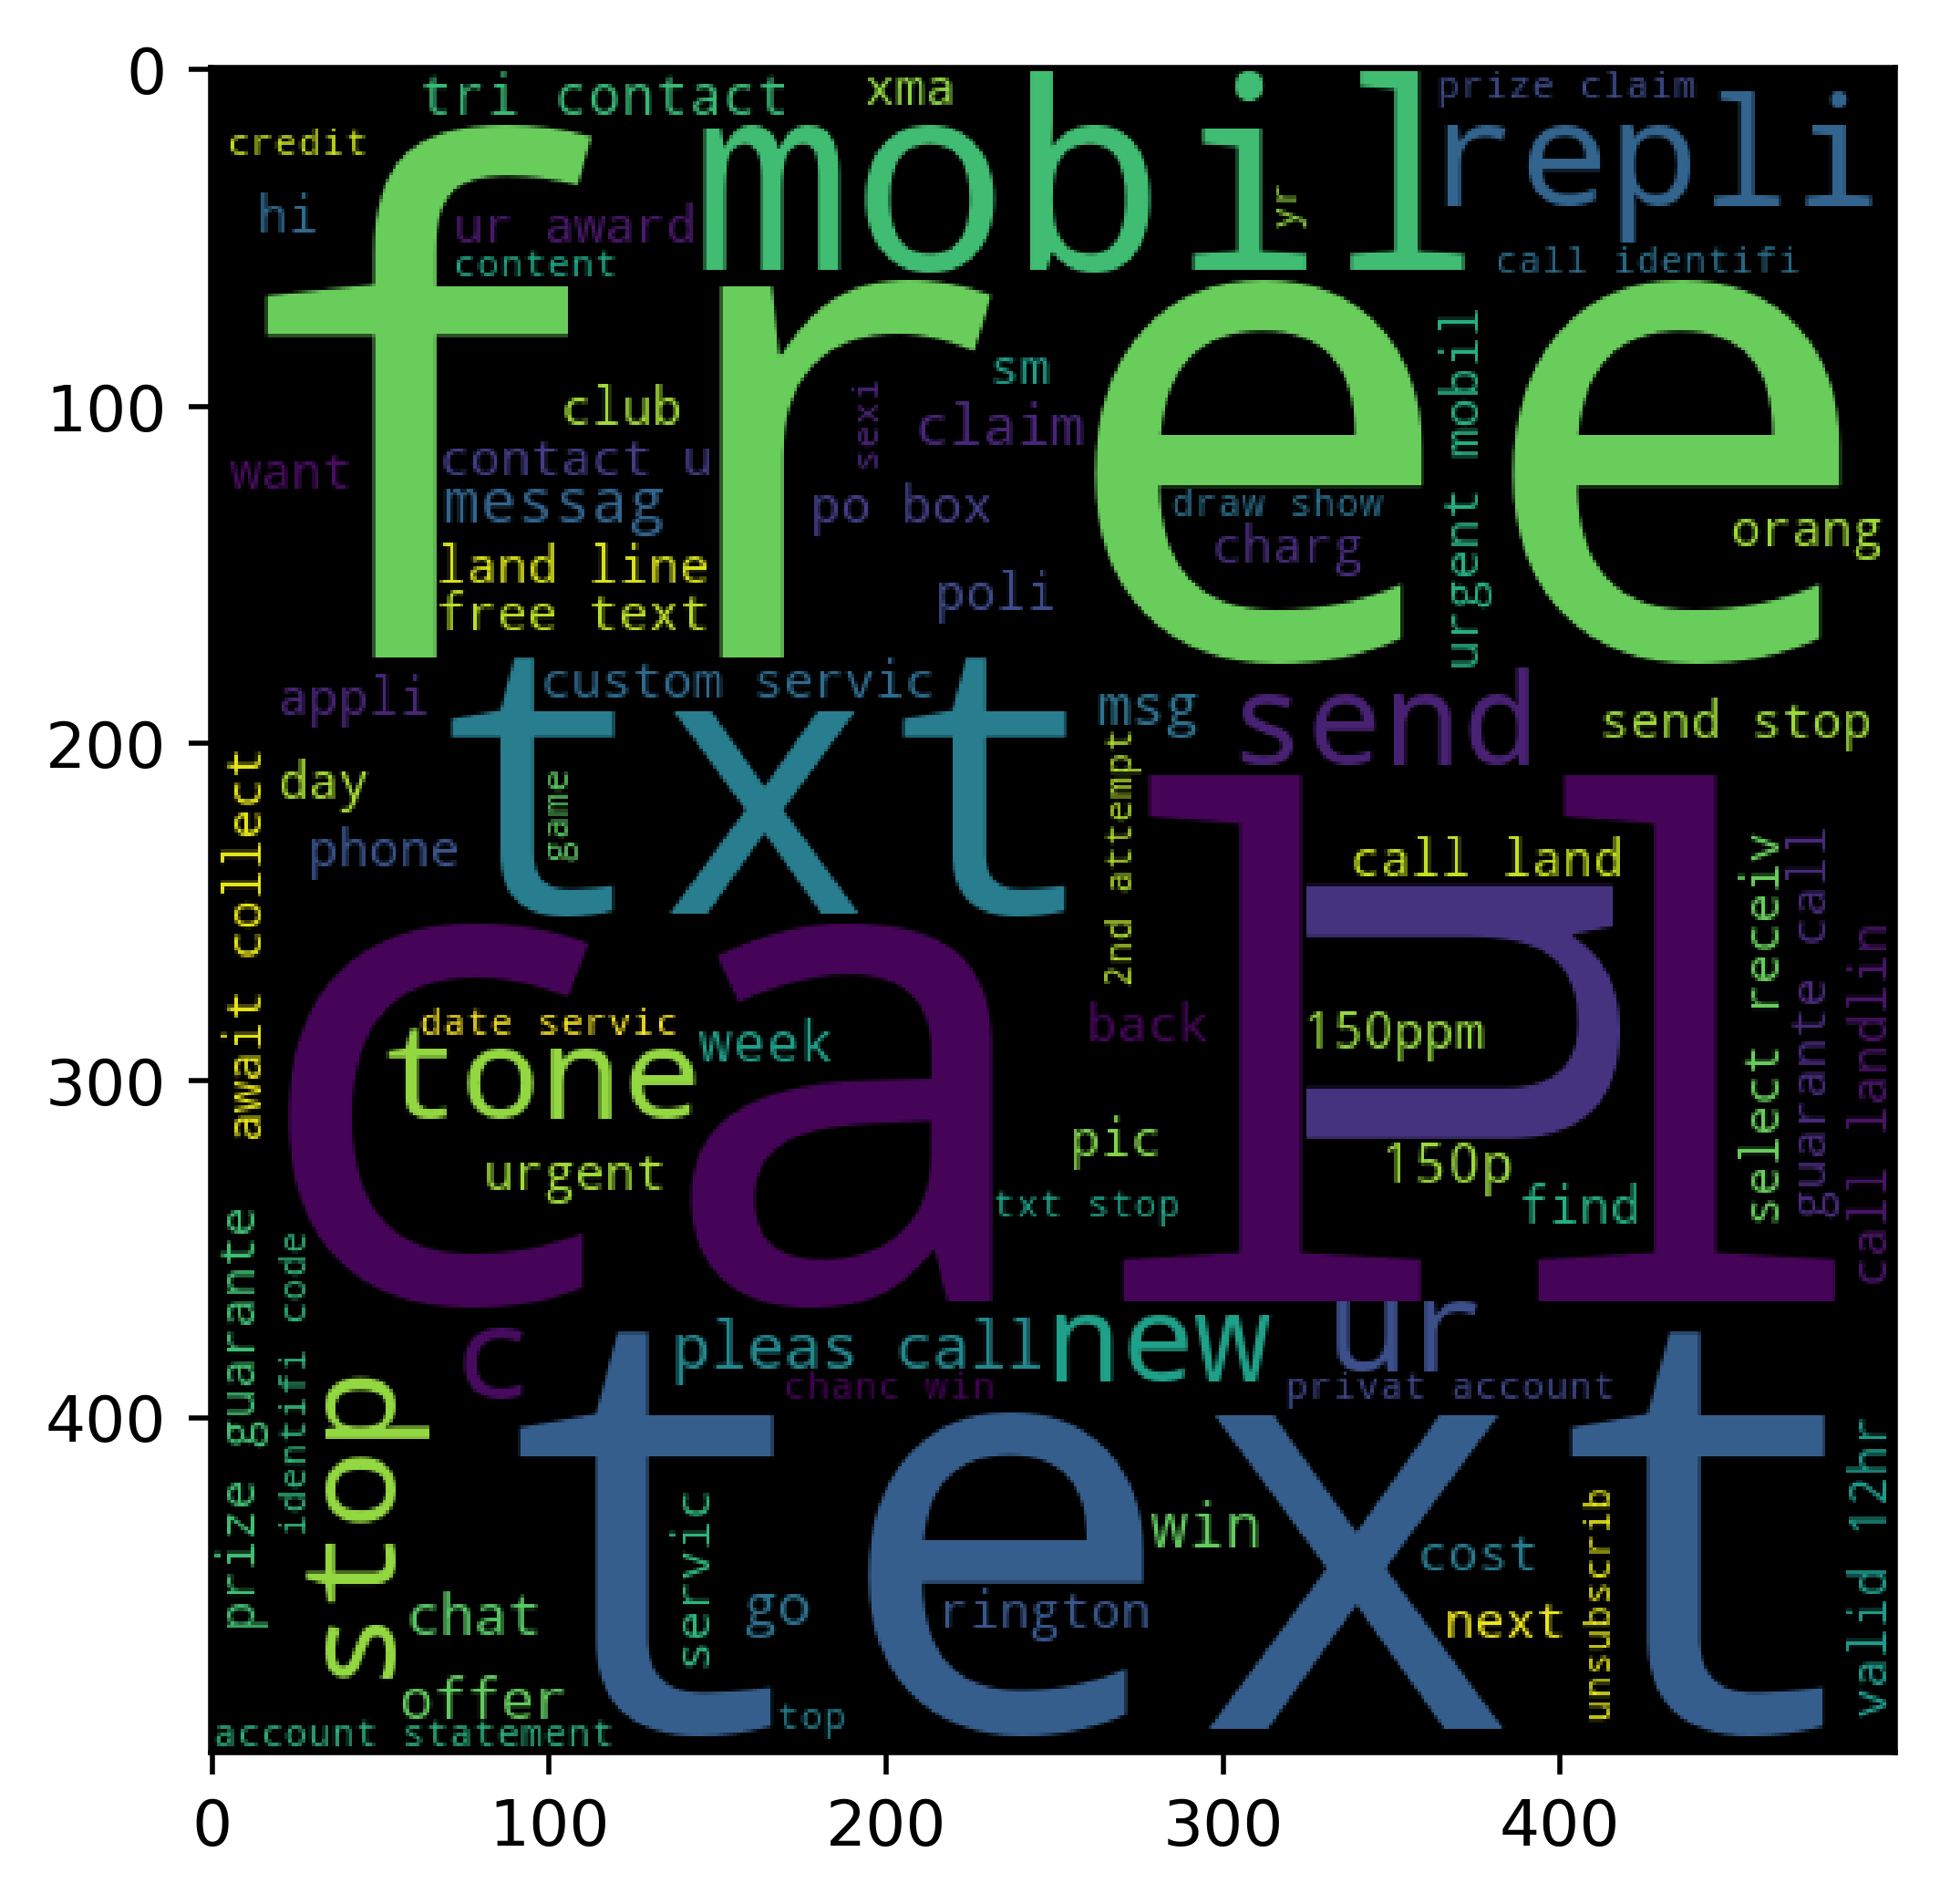

In [97]:
plt.figure(dpi=500)
plt.imshow(spam_wc)

In [98]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep='" "'))

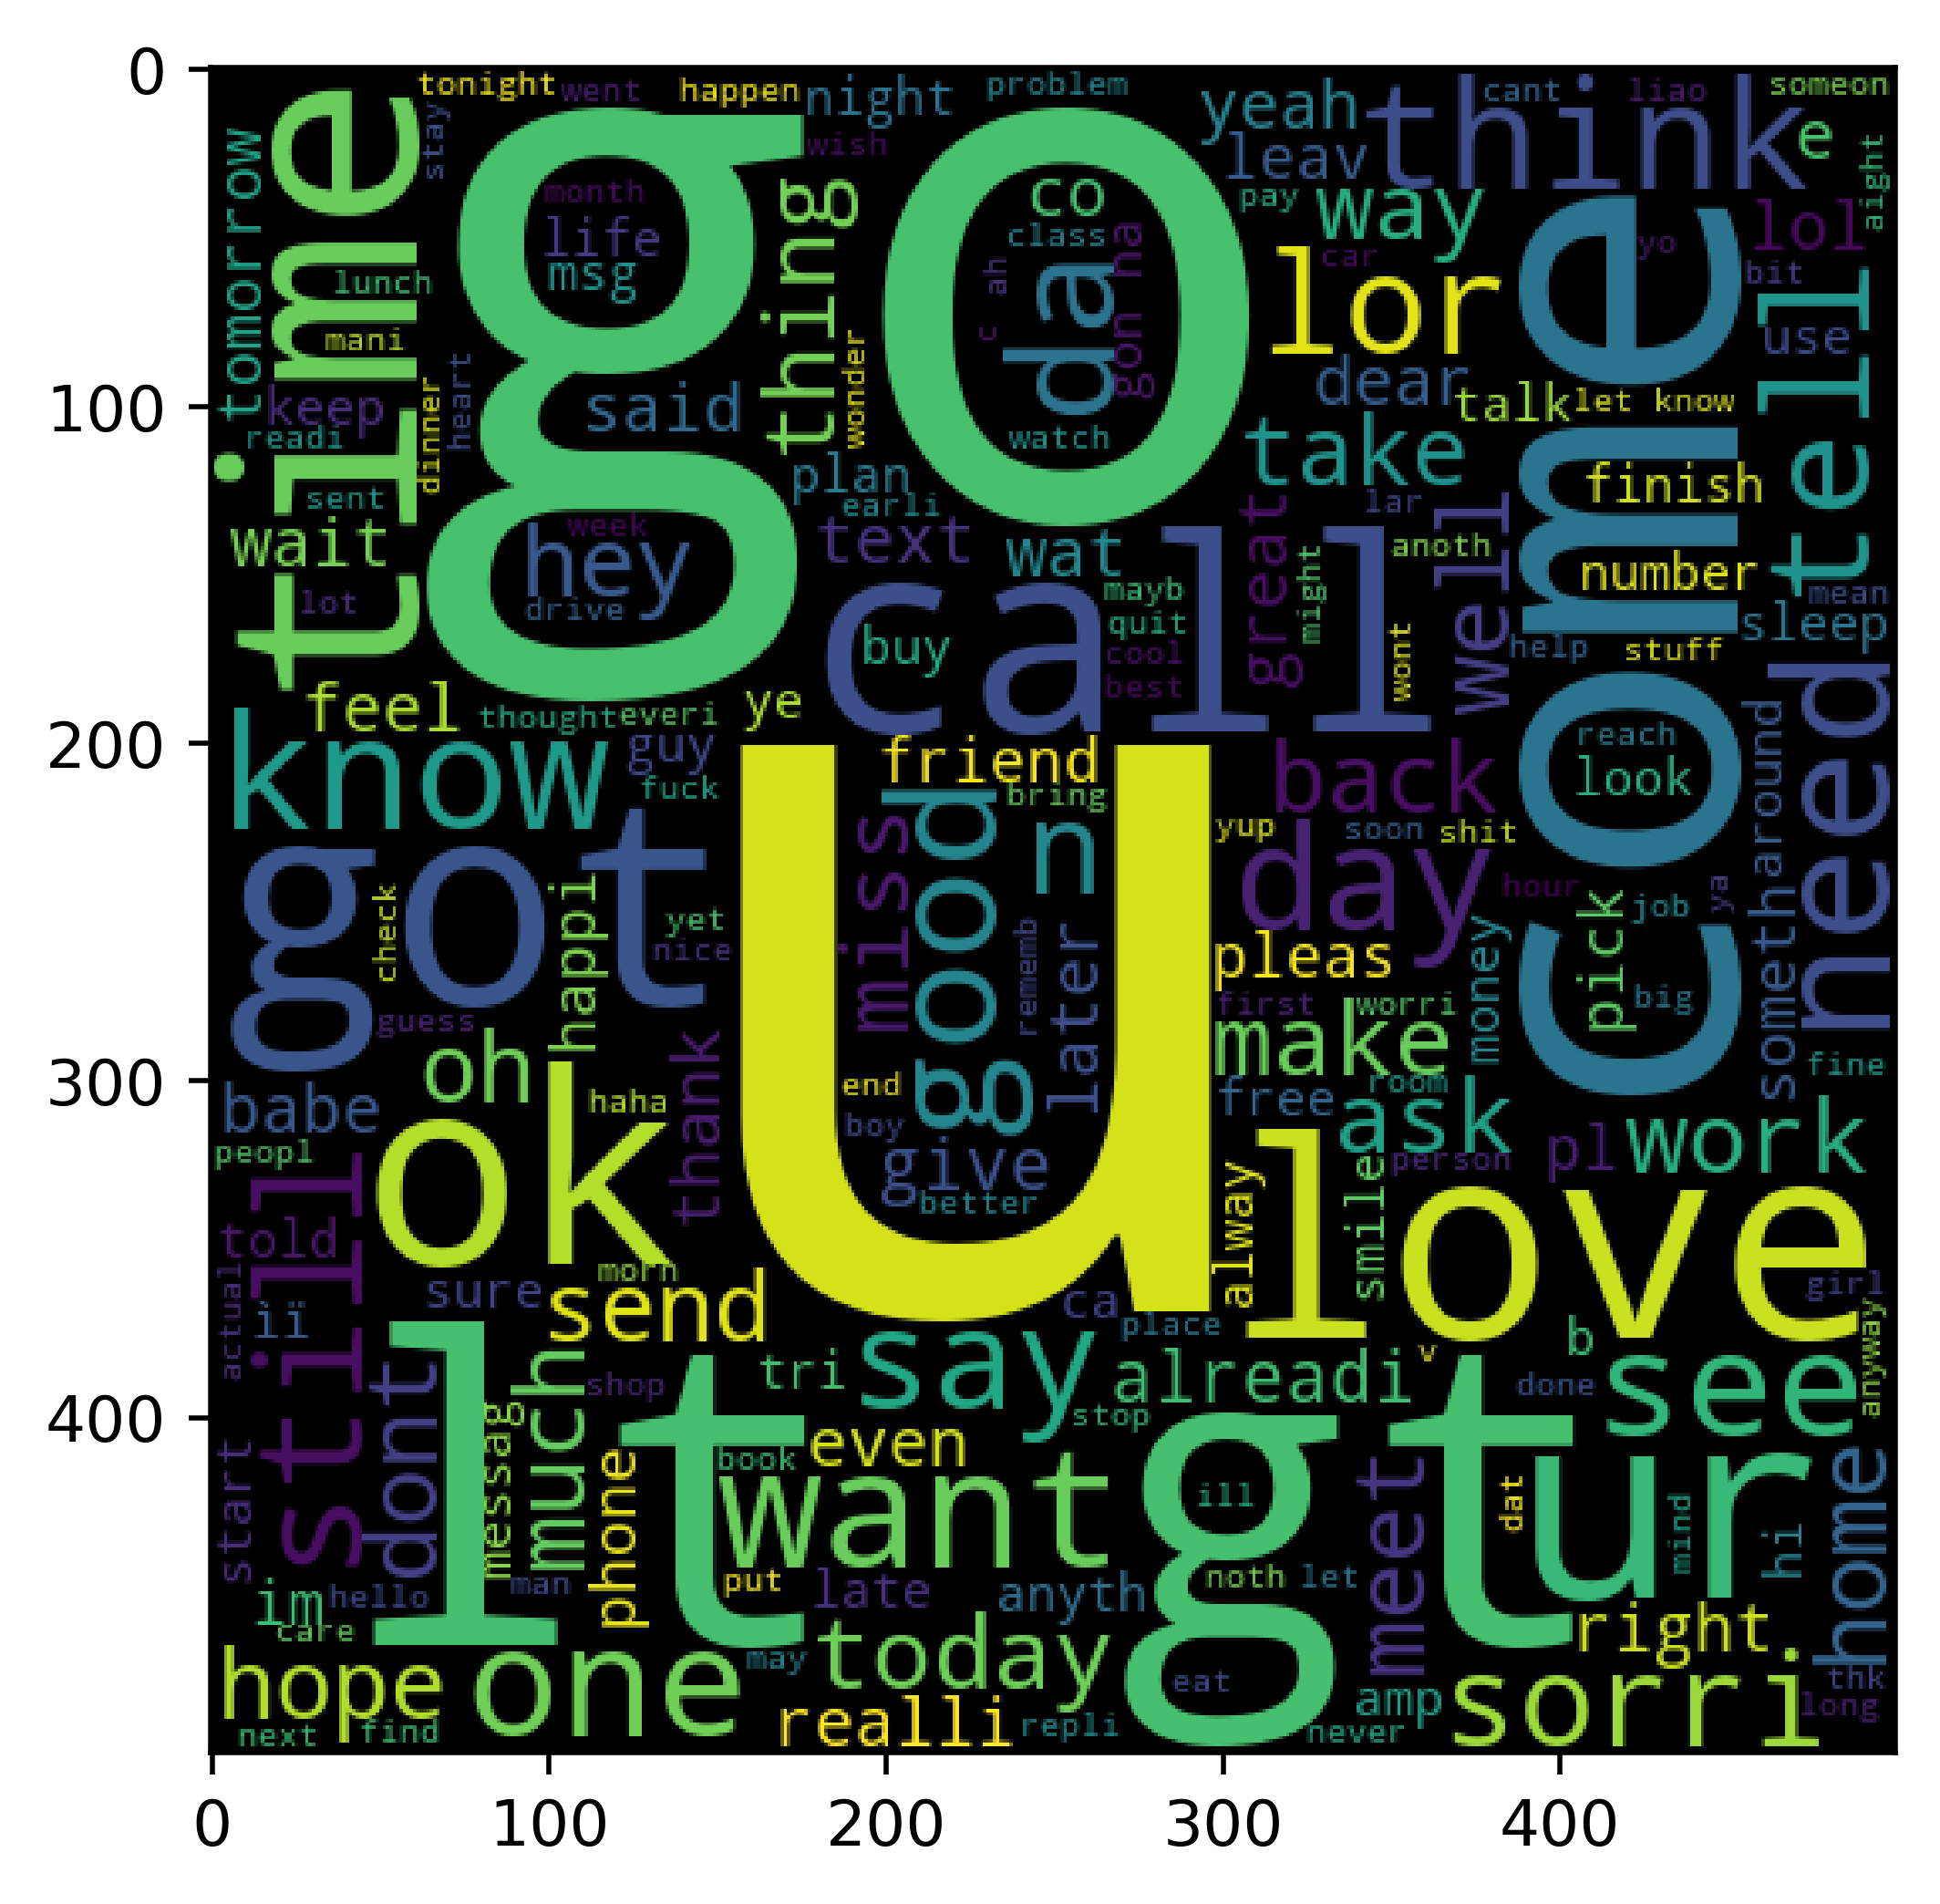

In [99]:
plt.figure(dpi=500)
plt.imshow(ham_wc)

In [100]:
# displaying the top 30 words in spam sms

In [101]:
df[df['target']==1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [102]:
df[df['target']==1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [185]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
# print(spam_corpus)      

In [186]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [187]:
# for counting the words
from collections import Counter


In [188]:
spam_df=pd.DataFrame(Counter(spam_corpus).most_common()).rename(columns={0:'words',1:'count'})
spam_df

,words,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
...,...,...
2217,shit,1
2218,bailiff,1
2219,hous,1
2220,087187272008,1


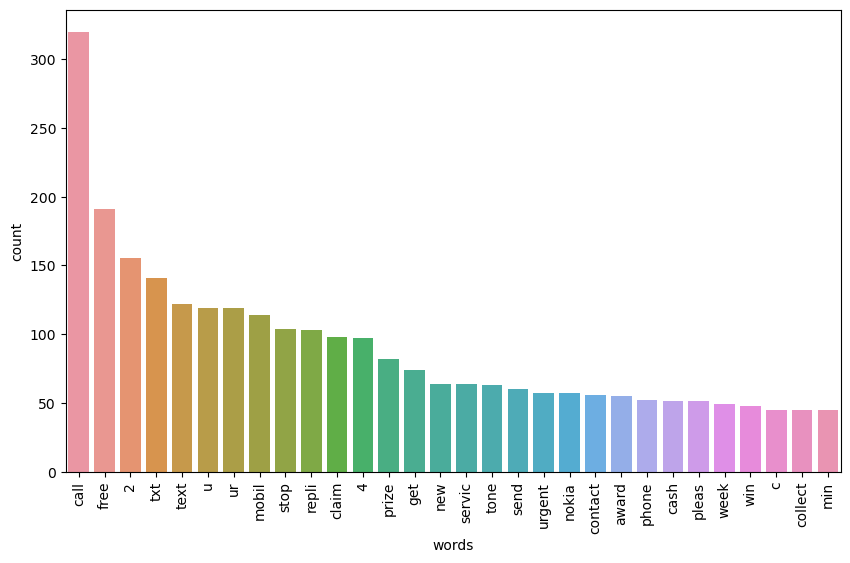

In [189]:
plt.figure(figsize=(10,6))
sns.barplot(x='words',y='count',data=spam_df.head(30))
plt.xticks(rotation='vertical')
plt.show()

In [190]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [191]:
ham_corpus


['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [192]:
ham_df=pd.DataFrame(Counter(ham_corpus).most_common()).rename(columns={0:'words',1:'count'})
ham_df

,words,count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
...,...,...
5385,nmde,1
5386,dump,1
5387,heap,1
5388,salesman,1


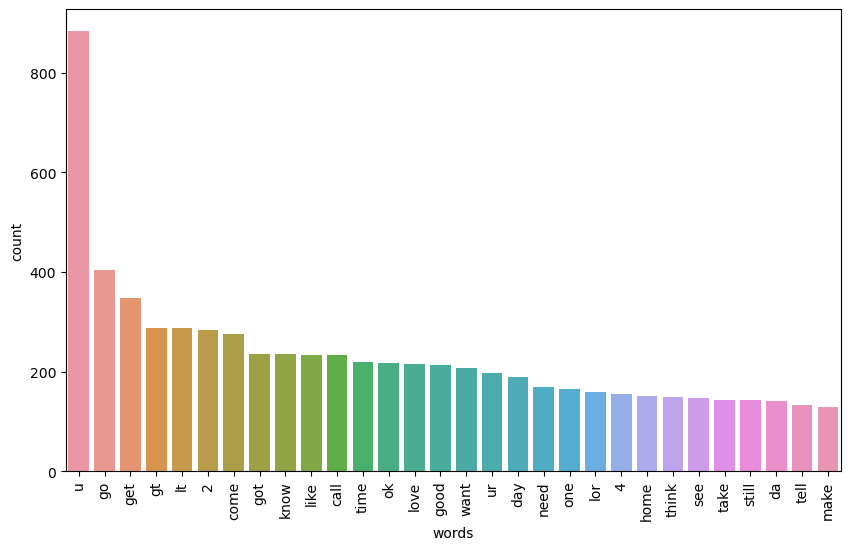

In [193]:
plt.figure(figsize=(10,6))
sns.barplot(x='words',y='count',data=ham_df.head(30))
plt.xticks(rotation='vertical')
plt.show()

# 4. Feature Engineering

In [194]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [195]:
X=tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [196]:
X.shape

(5169, 3000)

In [197]:
y=df['target'].values

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

# 5. Model Building

In [104]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [201]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [202]:
gnb.fit(x_train,y_train)
y_pred_test1=gnb.predict(x_test)
y_pred_train1=gnb.predict(x_train)
print('Testing Accuracy',accuracy_score(y_test,y_pred_test1))
print('Trainning_Accuracy',accuracy_score(y_train,y_pred_train1))
print('Precision_Score',precision_score(y_train,y_pred_train1))
print('Confusion_matrix\n',confusion_matrix(y_train,y_pred_train1))



Testing Accuracy 0.8694390715667312
Trainning_Accuracy 0.8931076178960097
Precision_Score 0.5381400208986415
Confusion_matrix
 [[3178  442]
 [   0  515]]


In [ ]:
# performance check metrics for regression -----------r2_score
# performance check metrics for classification--------accuracy_score (confusion metrics)
#                                                     (TP+TN)/(TP+FP+TN+FN)

In [203]:
mnb.fit(x_train,y_train)
y_pred_test2=mnb.predict(x_test)
y_pred_train2=mnb.predict(x_train)
print('Testing Accuracy',accuracy_score(y_test,y_pred_test2))
print('Trainning_Accuracy',accuracy_score(y_train,y_pred_train2))
print('Precision_Score',precision_score(y_train,y_pred_train2))
print('Confusion_matrix\n',confusion_matrix(y_train,y_pred_train2))



Testing Accuracy 0.9709864603481625
Trainning_Accuracy 0.9789600967351875
Precision_Score 0.9953703703703703
Confusion_matrix
 [[3618    2]
 [  85  430]]


In [204]:
bnb.fit(x_train,y_train)
y_pred_test3=bnb.predict(x_test)
y_pred_train3=bnb.predict(x_train)
print('Testing Accuracy',accuracy_score(y_test,y_pred_test3))
print('Trainning_Accuracy',accuracy_score(y_train,y_pred_train3))
print('Precision_Score',precision_score(y_train,y_pred_train3))
print('Confusion_matrix\n',confusion_matrix(y_train,y_pred_train3))



Testing Accuracy 0.9835589941972921
Trainning_Accuracy 0.9857315598548972
Precision_Score 0.9935064935064936
Confusion_matrix
 [[3617    3]
 [  56  459]]


In [105]:
svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [106]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [1]:
# clfs.items()

In [207]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)

    accuracy_test = accuracy_score(y_test,y_pred_test)
    accuracy_train = accuracy_score(y_train,y_pred_train)

    
    return accuracy_test,accuracy_train

In [208]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9963724304715841)

In [170]:
accuracy_train1 = []
accuracy_test1 = []

precision_scores = []

for name,clf in clfs.items():
    
    accuracy_test,accuracy_train,precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Training Accuracy - ",accuracy_train)
    print("Testing Accuracy - ",accuracy_test)
    print("Precision - ",precision)
    
    accuracy_train1.append(accuracy_train)
    accuracy_test1.append(accuracy_test)

    precision_scores.append(precision)

For  SVC
Training Accuracy -  0.9963724304715841
Testing Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  KN
Training Accuracy -  0.9257557436517533
Testing Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Training Accuracy -  0.9789600967351875
Testing Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Training Accuracy -  0.9496977025392986
Testing Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Training Accuracy -  0.9654171704957678
Testing Accuracy -  0.9564796905222437
Precision -  0.979381443298969
For  RF
Training Accuracy -  0.999758162031439
Testing Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Training Accuracy -  0.9717049576783555
Testing Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Training Accuracy -  0.9990326481257558
Testing Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Training Accuracy -  0.999758162031439
Testing Accuracy -  0.974

In [173]:
performance_df =pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_train':accuracy_train1,'Accuracy_test':accuracy_test1})
performance_df.sort_values(by='Accuracy_test',ascending=False)

,Algorithm,Accuracy_train,Accuracy_test
5,RF,0.999758,0.975822
8,ETC,0.999758,0.974855
0,SVC,0.996372,0.972921
2,NB,0.978960,0.970986
10,xgb,0.984522,0.967118
6,AdaBoost,0.971705,0.960348
7,BgC,0.999033,0.958414
4,LR,0.965417,0.956480
9,GBDT,0.967110,0.946809
3,DT,0.949698,0.929400


In [165]:
performance_df.sort_values('Precision',ascending=False)

,Algorithm,Accuracy_train,Accuracy_test,Precision
1,KN,0.925756,0.905222,1.000000
2,NB,0.978960,0.970986,1.000000
5,RF,0.999758,0.975822,0.982906
0,SVC,0.985006,0.975822,0.974790
8,ETC,0.999758,0.974855,0.974576
4,LR,0.963966,0.958414,0.970297
10,xgb,0.984522,0.967118,0.933333
6,AdaBoost,0.971705,0.960348,0.929204
9,GBDT,0.967110,0.946809,0.919192
7,BgC,0.999033,0.958414,0.868217


In [145]:
# improving model_performances
# 1. Change the max_features parameter of TfIdf


In [166]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))